==================================================================
### Code developed by: Vinicius Luiz Santos Silva

### Contact: v.santos-silva19@imperial.ac.uk / viluiz@gmail.com
==================================================================

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import time

# Load data

In [3]:
# Mesh size
nl = 10
nc = 10
print('Grid: ', nl, 'x',nc)

Grid:  10 x 10


In [4]:
import joblib
#...
pca_compress = joblib.load("pca_compress_15.pkl") 
X_train_compressed = np.loadtxt('X_train_pca.csv', delimiter=',') 

X_train_1D = np.loadtxt('X_train_1D.csv', delimiter=',') 
times  = np.loadtxt('times.csv', delimiter=',') 
R0s  = np.loadtxt('R0s.csv', delimiter=',') 
nrun = int(X_train_1D.shape[0]/len(times))
with open('groups.txt') as f:
    groups = [g.strip() for g in f.readlines()]

# PCA recovered
X_recovered = pca_compress.inverse_transform(X_train_compressed)

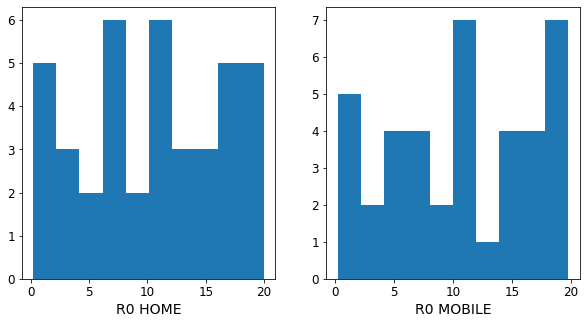

0 [ 9.10159075 10.08695344]
1 [ 7.71078825 10.35154634]
2 [4.23251311 7.39518605]
3 [5.84936489 6.24649379]
4 [1.36995521 0.20782674]
5 [18.90887431  6.82953592]
6 [12.43432197 16.6112348 ]
7 [11.92292511  4.86196673]
8 [18.09294985 14.93388913]
9 [0.54705227 1.84987129]
10 [3.90677652 1.47526045]
11 [17.09084983  5.31819101]
12 [ 1.26174869 15.83571824]
13 [10.36712108 11.26475328]
14 [6.92546289 5.43908513]
15 [ 6.23889625 10.69922804]
16 [19.97514412 16.70805477]
17 [17.8809354  19.77202359]
18 [17.22569979  0.83634807]
19 [15.90756837 19.56619441]
20 [ 8.34134321 19.10279658]
21 [17.08319131  0.20635904]
22 [ 1.19241885 18.55688092]
23 [12.04611011 19.05352379]
24 [18.51066252 18.15638863]
25 [17.89853933 15.19543399]
26 [15.74780614  2.87313617]
27 [ 0.22511199 11.64714818]
28 [2.88259784 2.83530109]
29 [10.95756013  8.84320549]
30 [11.96896674  9.26551056]
31 [12.62607087 11.00676269]
32 [ 6.97028376 15.91936959]
33 [11.90436138  5.90682395]
34 [14.74628483  6.13046383]
35 [ 2.80

In [5]:
fig, axs = plt.subplots(1,2, figsize=[10,5])
axs[0].hist(R0s[:,0]);
axs[0].set_xlabel('R0 HOME')
axs[1].hist(R0s[:,1]);
axs[1].set_xlabel('R0 MOBILE')
plt.show()

for i, r0 in enumerate(R0s):
    print(i, r0)

In [6]:
X_test_compressed = np.loadtxt('X_test_pca.csv', delimiter=',') 
X_test_1D = np.loadtxt('X_test_1D.csv', delimiter=',') 
X_test_recovered = pca_compress.inverse_transform(X_test_compressed)
R0s_test  = np.loadtxt('R0s_test.csv', delimiter=',') 

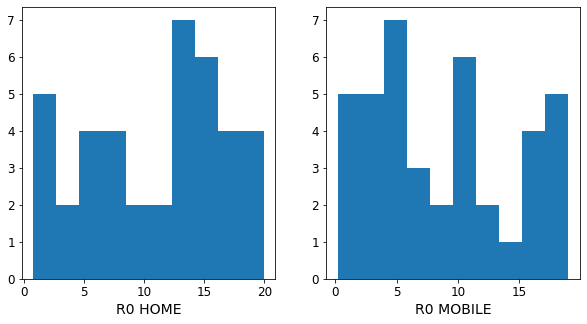

0 [1.48693924 2.58914368]
1 [3.46470961 0.67567346]
2 [ 7.72820859 17.37615382]
3 [ 0.79534541 15.77528304]
4 [14.42865822  9.5964062 ]
5 [16.36755376  3.73374808]
6 [13.96009165 15.62530612]
7 [16.58901169  9.12024959]
8 [11.05249798  9.07843494]
9 [14.49723729  5.72135142]
10 [16.59428641 11.43151196]
11 [12.53633355  0.59802588]
12 [12.48554238  6.85886438]
13 [7.60101161 7.02551486]
14 [ 2.98552717 11.32235065]
15 [12.502665   13.08309523]
16 [14.72955321  9.62089529]
17 [ 9.52868591 10.09699439]
18 [5.70388486 7.56573647]
19 [19.95541901  4.70213843]
20 [14.39751377  5.08060823]
21 [11.47856089 14.4686313 ]
22 [ 7.00853965 18.97807871]
23 [13.64880035  3.59869313]
24 [13.570599   16.65141278]
25 [19.43114598  3.89827579]
26 [6.52407873 5.74319973]
27 [17.35231058  2.13555806]
28 [7.9632486  0.89085507]
29 [ 5.20153773 15.28762389]
30 [ 0.88557991 18.53081   ]
31 [19.20428158  5.25265288]
32 [14.63540462 12.77845383]
33 [19.39548932 18.47823309]
34 [15.91844554  0.24226841]
35 [13.

In [7]:
fig, axs = plt.subplots(1,2, figsize=[10,5])
axs[0].hist(R0s_test[:,0]);
axs[0].set_xlabel('R0 HOME')
axs[1].hist(R0s_test[:,1]);
axs[1].set_xlabel('R0 MOBILE')
plt.show()

for i, r0 in enumerate(R0s_test):
    print(i, r0)

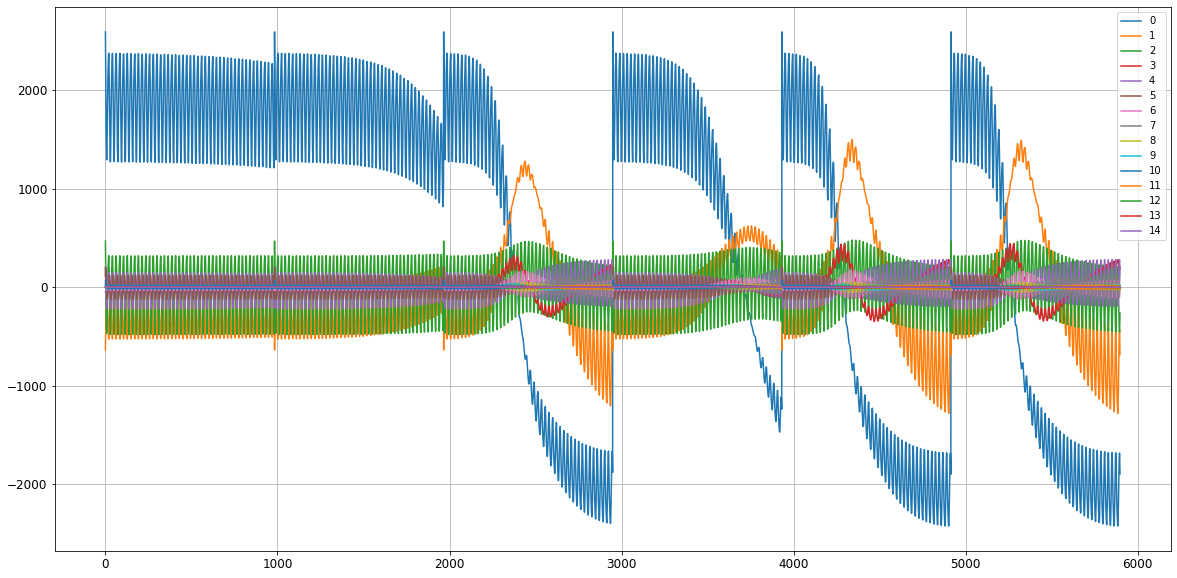

In [8]:
fig, ax = plt.subplots(1,1, figsize=[20,10])
ax.plot(X_test_compressed[len(times)*0:len(times)*6]);
ax.grid()
ax.legend(range(15))

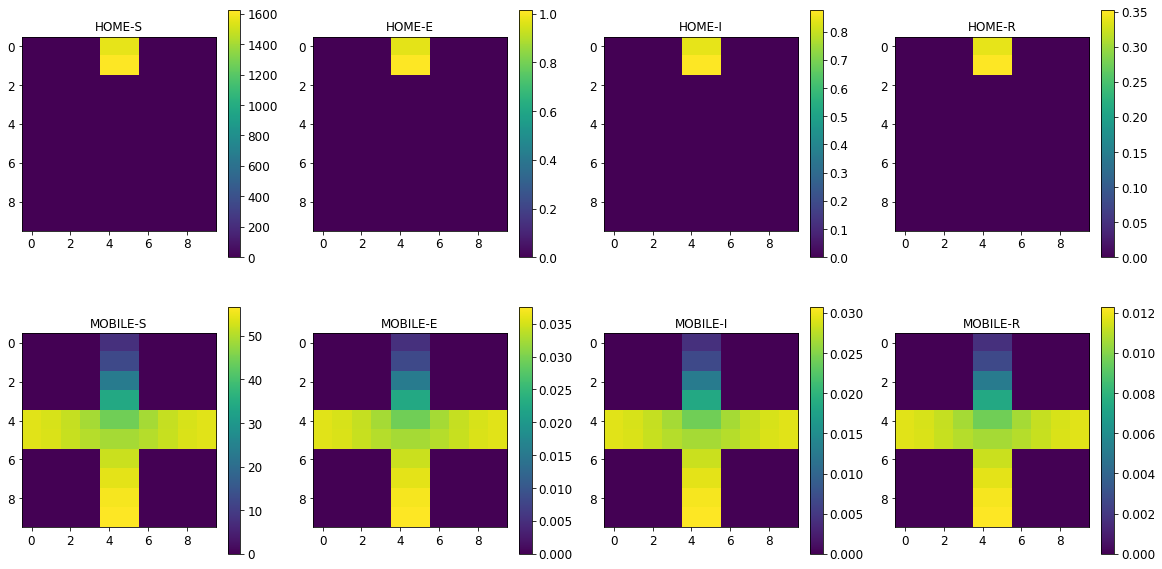

In [9]:
fig, ax = plt.subplots(2,4, figsize=[20,10])
for i, group in enumerate(groups):
    im = ax.flatten()[i].imshow(X_test_1D.reshape(nrun,len(times),len(groups),nl,nc)[0,100,i,:,:])
    fig.colorbar(im, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(group)

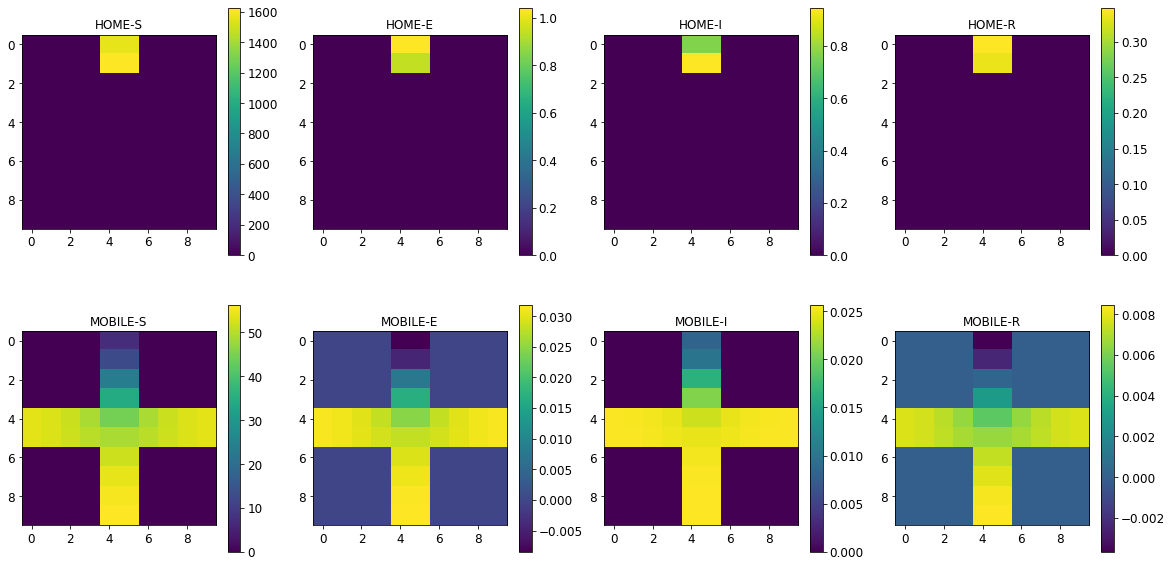

In [10]:
fig, ax = plt.subplots(2,4, figsize=[20,10])
for i, group in enumerate(groups):
    im = ax.flatten()[i].imshow(X_test_recovered.reshape(nrun,len(times),len(groups),nl,nc)[0,100,i,:,:])
    fig.colorbar(im, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(group)

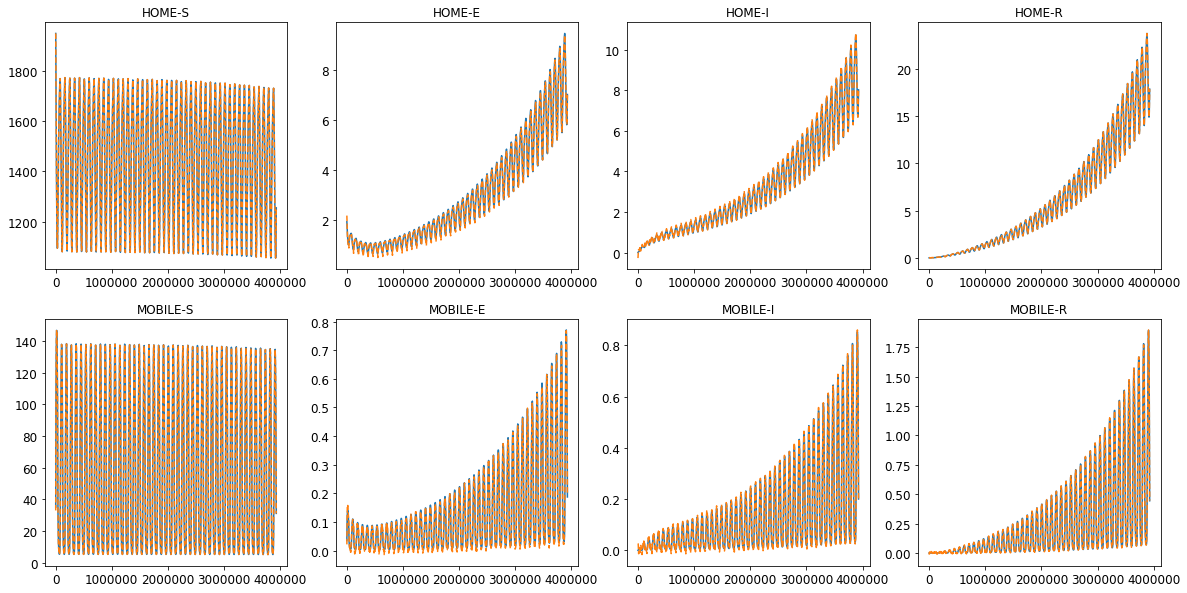

In [11]:
fig, ax = plt.subplots(2,4, figsize=[20,10])
for i, group in enumerate(groups):
    ax.flatten()[i].plot(times, X_test_1D.reshape(nrun, len(times),len(groups),nl,nc)[0,:,i,0,4])
    ax.flatten()[i].plot(times, X_test_recovered.reshape(nrun, len(times),len(groups),nl,nc)[0,:,i,0,4],'--')
    ax.flatten()[i].set_title(group)

# Prepare data

In [12]:
pca_size = X_test_compressed.shape[1]
X_test_compressed.shape

(39320, 15)

In [13]:
X_test_R0s = R0s_test.repeat(len(times), axis=0)
X_test_R0s.shape

(39320, 2)

In [14]:
X_test_compressedplus = np.concatenate((X_test_compressed, X_test_R0s), axis=1) 
codings_size = X_test_compressedplus.shape[1]
X_test_compressedplus.shape

(39320, 17)

In [15]:
scaler = joblib.load("scaler.pkl")
X_test_scaled = scaler.transform(X_test_compressedplus)
np.allclose(X_test_compressedplus, scaler.inverse_transform(X_test_scaled))

True

(array([ 28137.,  43855.,  67304., 115682., 180901., 100822.,  51277.,
         40443.,  24809.,  15210.]),
 array([-1.04292536, -0.83611394, -0.62930251, -0.42249108, -0.21567965,
        -0.00886823,  0.1979432 ,  0.40475463,  0.61156606,  0.81837748,
         1.02518891]),
 <a list of 10 Patch objects>)

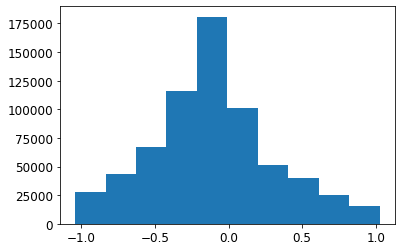

In [16]:
plt.hist(X_test_scaled.flatten())

In [17]:
def concat_timesteps(X_train, ntimes, step, times):
    X_train_concat = []
    for j in range(len(X_train)//len(times)):
        for i in range(j*len(times), j*len(times)+(len(times)-ntimes*step)):
            X_train_concat.append(X_train[i:i+ntimes*step:step])
    return np.array(X_train_concat)

In [18]:
ntimes = 10 # Consecutive times for the GAN
step = 2 # step between times

X_test_concat = concat_timesteps(X_test_scaled, ntimes, step, times)
X_test_concat_flatten = X_test_concat.reshape(X_test_concat.shape[0], codings_size*ntimes )

(38520, 10, 17)


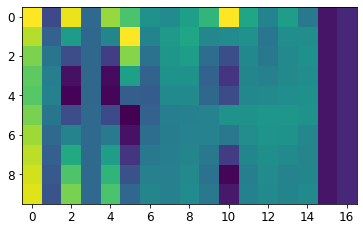

In [19]:
print(X_test_concat.shape)
plt.imshow(X_test_concat[0, :, :])

# Load model

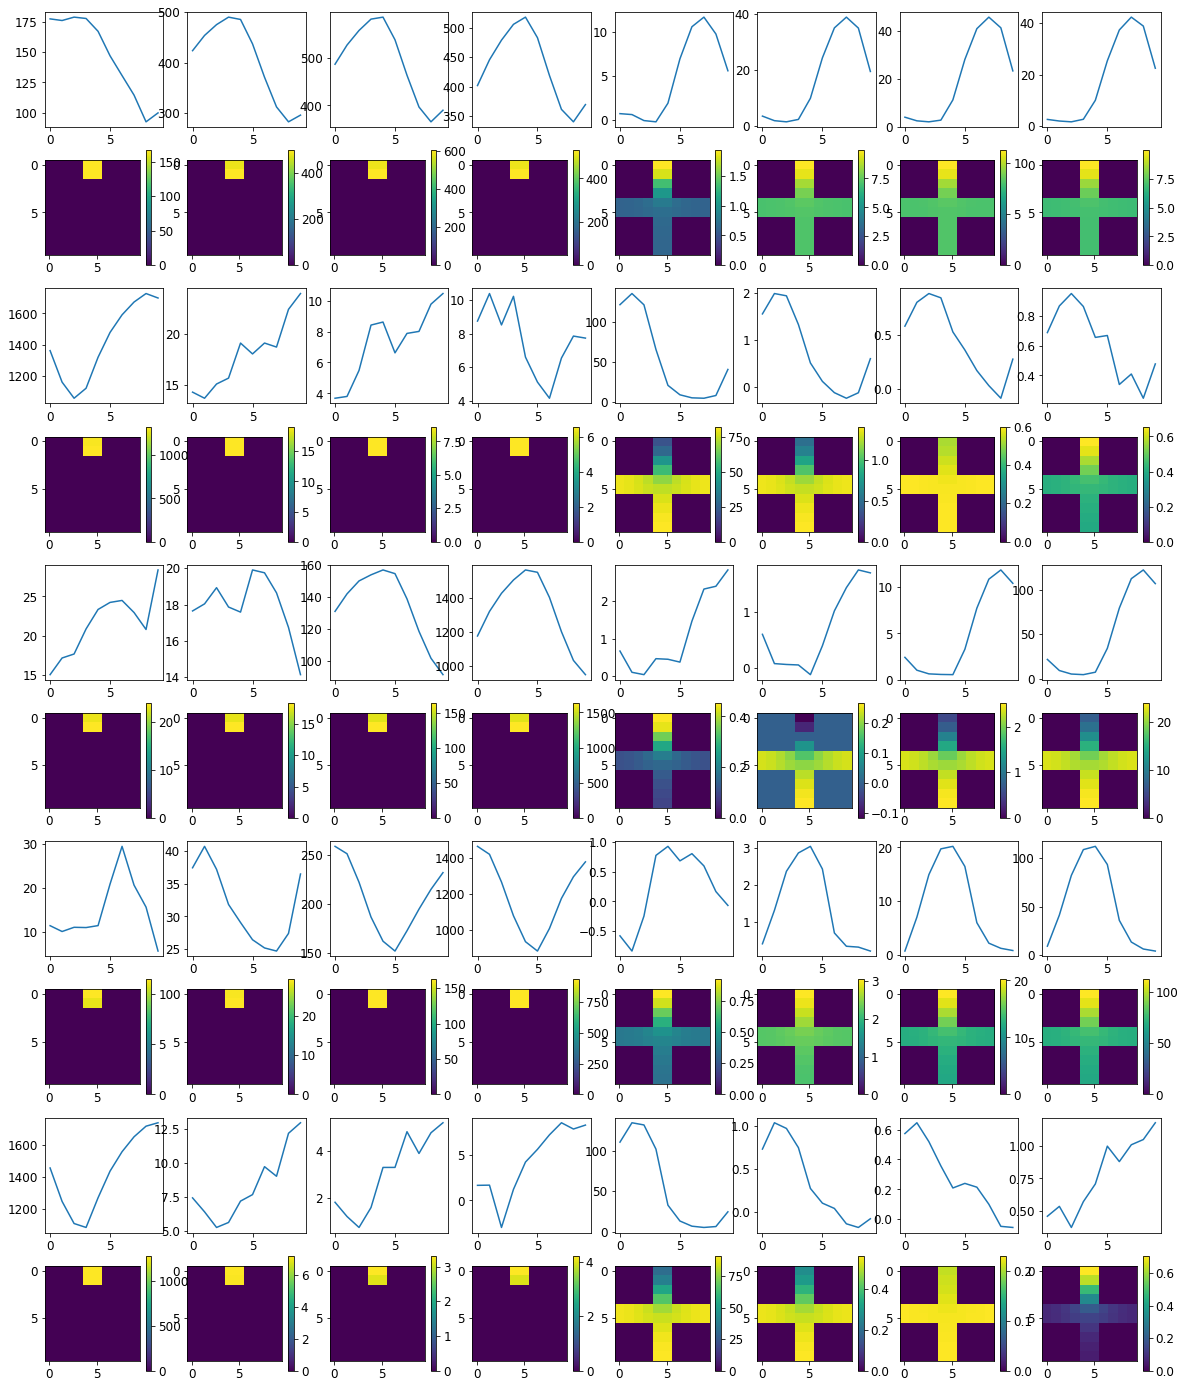

In [20]:
from tensorflow.keras.models import load_model
generator, discriminator = load_model('gan-tfex-DCGAN-5kernel.h5').layers

np.random.seed(0)
tf.random.set_seed(0)

npredict = 5
latent_size = 100
noise = tf.random.normal(shape=[npredict, latent_size])
X_generated = scaler.inverse_transform(generator.predict(noise).reshape(npredict*ntimes,codings_size))
R0_generated = X_generated[:,pca_size:]
X_generated = pca_compress.inverse_transform(X_generated[:,:pca_size])
X_generated = X_generated.reshape(npredict, ntimes, len(groups)*nl*nc)
fig, ax = plt.subplots(npredict*2,len(groups), figsize=[20,npredict*5])
for j in range(npredict):
    for i, group in enumerate(groups):
        for k in range(0,10,10): 
            ax.flatten()[i+2*j*len(groups)].plot(X_generated[j][:,i*nl*nc+4+10*k], '-')
    for i, group in enumerate(groups):
        im = ax.flatten()[i+(2*j+1)*len(groups)].imshow(X_generated[j].reshape(ntimes,len(groups),nl,nc)[4,i,:,:])
        fig.colorbar(im, ax=ax.flatten()[i+(2*j+1)*len(groups)])

# Predict with the GAN

## Predict one point

In [21]:
#weight = np.ones(codings_size)
#weight = np.concatenate((pca_compress.explained_variance_, np.mean(pca_compress.explained_variance_).repeat(2)),axis=None)
#weight = np.concatenate((pca_compress.singular_values_, np.mean(pca_compress.singular_values_).repeat(2)),axis=None)
weight = np.concatenate((pca_compress.singular_values_, 0.01*pca_compress.singular_values_.sum().repeat(2)/2),axis=None)

weight = tf.constant(weight, dtype=tf.float32)
weight

<tf.Tensor: id=1245, shape=(17,), dtype=float32, numpy=
array([3.3330681e+05, 1.2166467e+05, 5.2567664e+04, 2.9727166e+04,
       2.4324557e+04, 1.0762123e+04, 8.6157656e+03, 7.9793633e+03,
       2.8411521e+03, 2.2501648e+03, 2.0850576e+03, 1.5321442e+03,
       8.2077777e+02, 5.9175067e+02, 1.9133507e+02, 2.9963025e+03,
       2.9963025e+03], dtype=float32)>

In [22]:
optimizer = tf.keras.optimizers.Adam(1e-2)

def mse_loss(inp, outp):
    inp = tf.reshape(inp, [-1, codings_size])*tf.math.sqrt(weight)
    outp = tf.reshape(outp, [-1, codings_size])*tf.math.sqrt(weight)
    return tf.reduce_mean(tf.math.squared_difference(inp, outp))

In [23]:
@tf.function
def opt_step(latent_values, real_coding):
    with tf.GradientTape() as tape:
        tape.watch(latent_values)
        gen_output = generator(latent_values, training=False) 
        loss = mse_loss(real_coding, gen_output[:,:(ntimes - 1),:,:])   

    gradient = tape.gradient(loss, latent_values)  
    optimizer.apply_gradients(zip([gradient], [latent_values]))  
    
    return loss

In [24]:
def optimize_coding(real_coding):
    latent_values = tf.random.normal([len(real_coding), latent_size], mean=0.0, stddev=0.01)  
    latent_values = tf.Variable(latent_values)     #make input a tensorflow variable so it can be trained
    
    loss = []
    for epoch in range(1000):
        loss.append(opt_step(latent_values, real_coding).numpy())
        
    plt.plot(loss)
    #plt.grid()
    plt.show
        
    return latent_values, loss[-1]  

In [25]:
n = 2400
real_coding = X_test_concat_flatten[n].reshape(1,-1)
real_coding = real_coding[:,:codings_size*(ntimes - 1)]
real_coding = tf.constant(real_coding)
real_coding = tf.cast(real_coding, dtype=tf.float32)

Initial point losses:  - 26s
[1379.3281, 4.645355, 4.634228, 4.6146226, 4.601417, 4.6353707, 4.6239533, 4.505029, 4.6053367, 4.604623]
Loss:  4.5040727
<tf.Variable 'Variable:0' shape=(1, 100) dtype=float32, numpy=
array([[-0.00202619,  0.02647102, -0.1981261 , -0.1801668 ,  0.10306699,
        -0.21330136, -0.222952  , -0.09325381, -0.0834235 ,  0.10221752,
         0.04924703,  0.02790425, -0.10737243, -0.04793504, -0.217964  ,
        -0.32791466,  0.08121058, -0.19760913,  0.13088642, -0.09481008,
        -0.05278546,  0.12136714,  0.06459079, -0.14601429,  0.2417553 ,
         0.16789997,  0.01491978, -0.2208352 ,  0.07636879,  0.08519275,
        -0.00125375, -0.11527419, -0.29889858, -0.31540573, -0.20056215,
         0.04427537,  0.12922403, -0.06649648, -0.3833536 ,  0.16996357,
        -0.17649122,  0.42768353,  0.0215967 , -0.36465436,  0.09974137,
         0.3350262 ,  0.07195089, -0.2769569 ,  0.20278792, -0.09814221,
        -0.09608703, -0.04312028, -0.2977824 , -0.28552

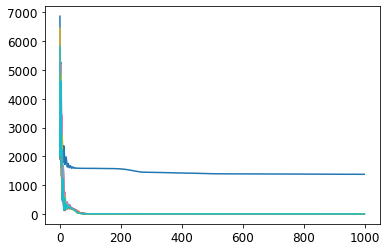

In [26]:
start = time.time()
list_latent_values = []
list_loss = []
for _ in range(10):   
    latent_values, loss = optimize_coding(real_coding)
    list_latent_values.append(latent_values)
    list_loss.append(loss)
latent_values = list_latent_values[np.argmin(list_loss)]
print('Initial point losses: ', end=' - ')
print ('{:.0f}s'.format( time.time()-start))
print(list_loss)

print('Loss: ', mse_loss(generator(latent_values)[:,:(ntimes - 1),:,:], real_coding).numpy())
print(latent_values)

In [27]:
X_generated = scaler.inverse_transform(generator.predict(latent_values).reshape(ntimes,codings_size))
R0_generated = X_generated[:,pca_size:]
X_generated = pca_compress.inverse_transform(X_generated[:,:pca_size])
X_generated = X_generated.reshape(ntimes, len(groups)*nl*nc)

In [28]:
X_real = scaler.inverse_transform(X_test_concat_flatten[n].reshape(ntimes,codings_size))
R0_real = X_real[:,pca_size:]
X_real = pca_compress.inverse_transform(X_real[:,:pca_size])
X_real = X_real.reshape(ntimes, len(groups)*nl*nc)

In [29]:
print(R0_generated)
print()
print(R0_real[0])

[[ 7.2055206 16.628735 ]
 [ 7.225791  16.646473 ]
 [ 7.206751  16.660149 ]
 [ 7.188989  16.64738  ]
 [ 7.206744  16.572775 ]
 [ 7.2091565 16.581978 ]
 [ 7.247035  16.563086 ]
 [ 7.252365  16.615793 ]
 [ 7.234501  16.665344 ]
 [ 7.148827  16.725107 ]]

[ 7.72820859 17.37615382]


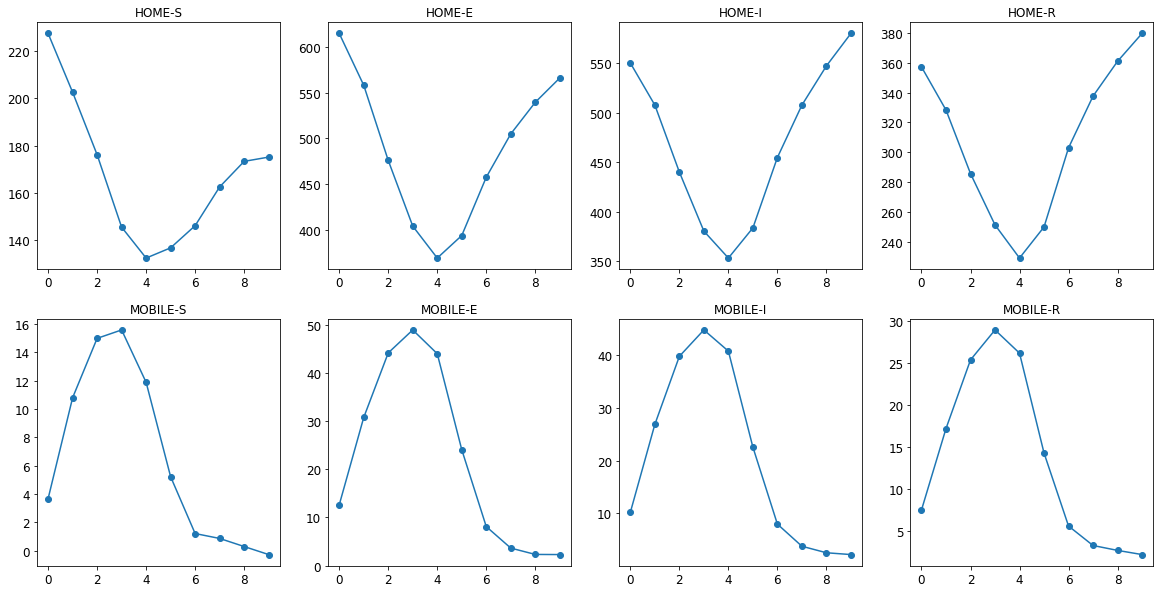

In [30]:
fig, ax = plt.subplots(2,4, figsize=[20,10])
for i, group in enumerate(groups):
    ax.flatten()[i].plot(X_generated[:,i*nl*nc+4], '-o')
    ax.flatten()[i].set_title(group)
#plt.savefig('GAN_generateddata.png')

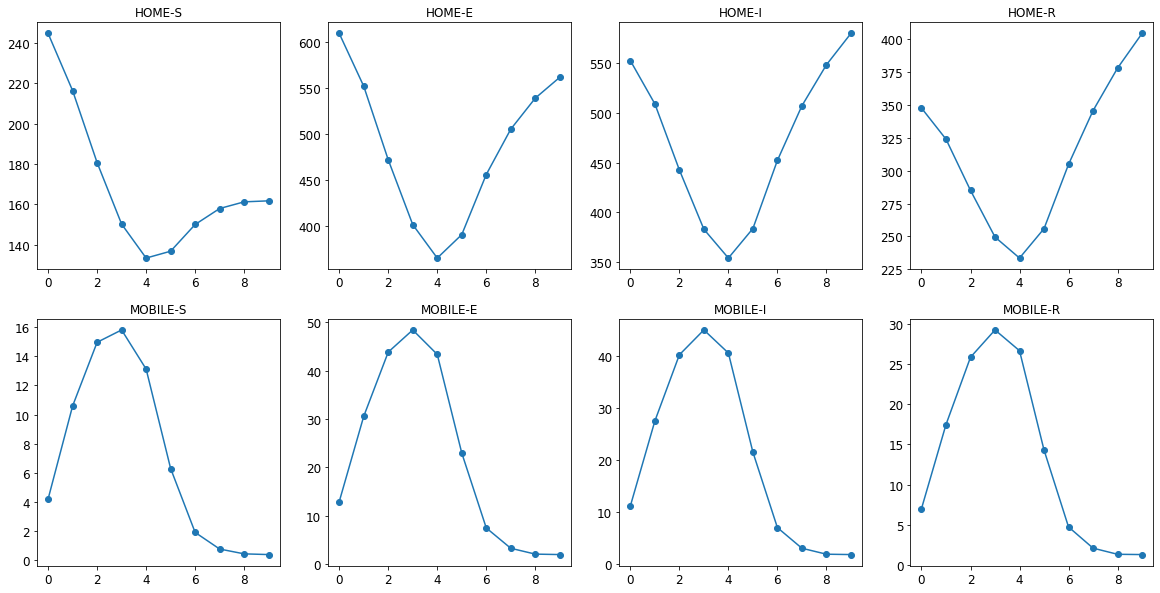

In [31]:
fig, ax = plt.subplots(2,4, figsize=[20,10])
for i, group in enumerate(groups):
    ax.flatten()[i].plot(X_real[:,i*nl*nc+4], '-o')
    ax.flatten()[i].set_title(group)
#plt.savefig('GAN_generateddata.png')

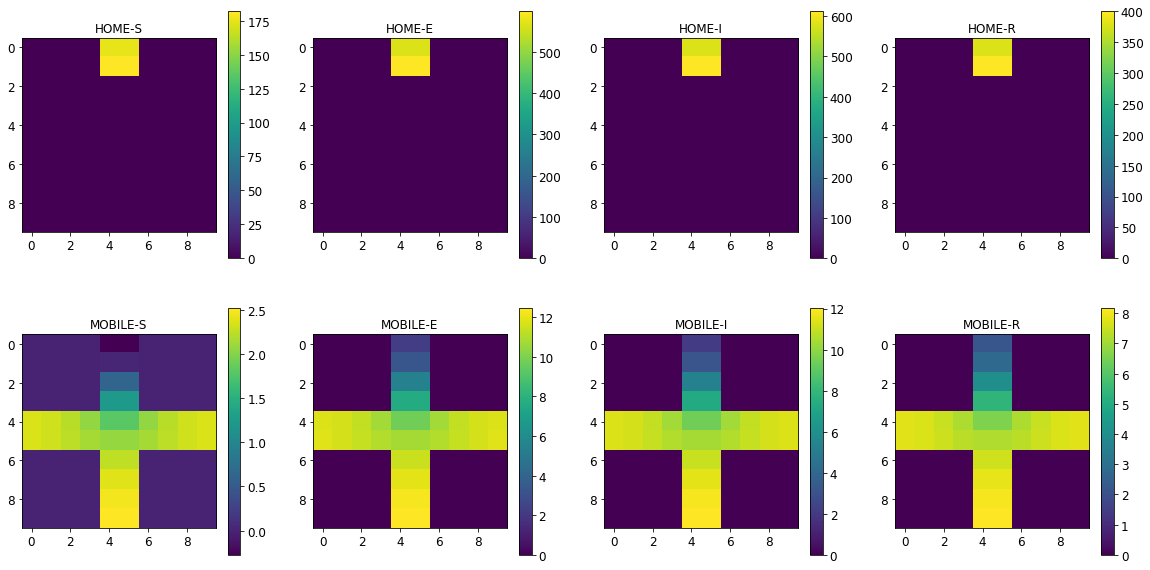

In [32]:
fig, ax = plt.subplots(2,4, figsize=[20,10])
for i, group in enumerate(groups):
    im = ax.flatten()[i].imshow(X_generated.reshape(ntimes,len(groups),nl,nc)[-1,i,:,:])
    fig.colorbar(im, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(group)
#plt.savefig('GAN_generateddata_mesh.png')

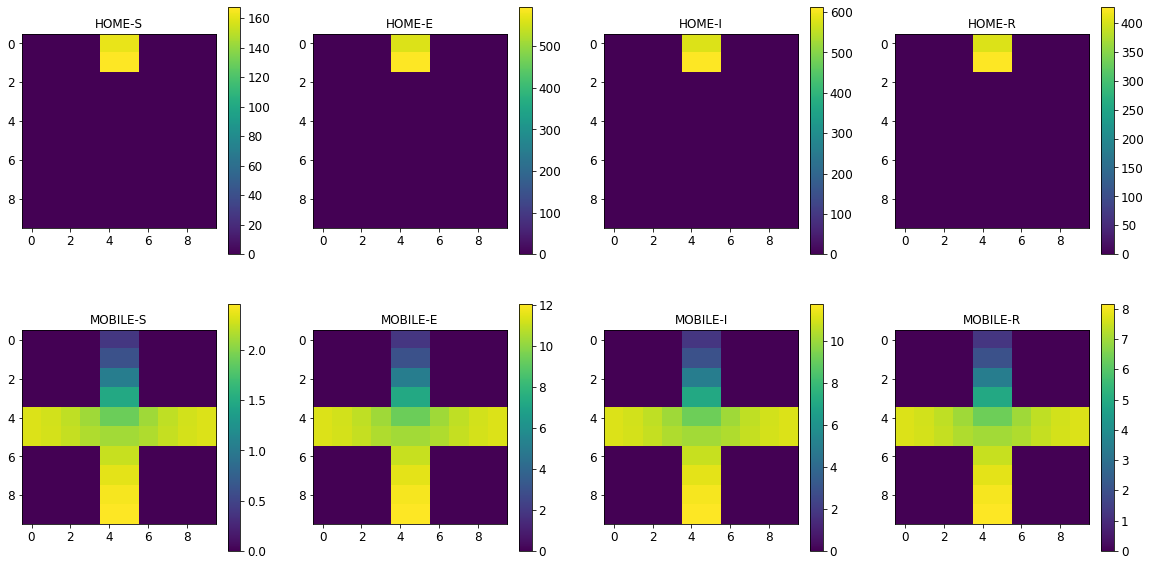

In [33]:
fig, ax = plt.subplots(2,4, figsize=[20,10])
for i, group in enumerate(groups):
    im = ax.flatten()[i].imshow(X_real.reshape(ntimes,len(groups),nl,nc)[-1,i,:,:])
    fig.colorbar(im, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(group)
#plt.savefig('GAN_generateddata_mesh.png')

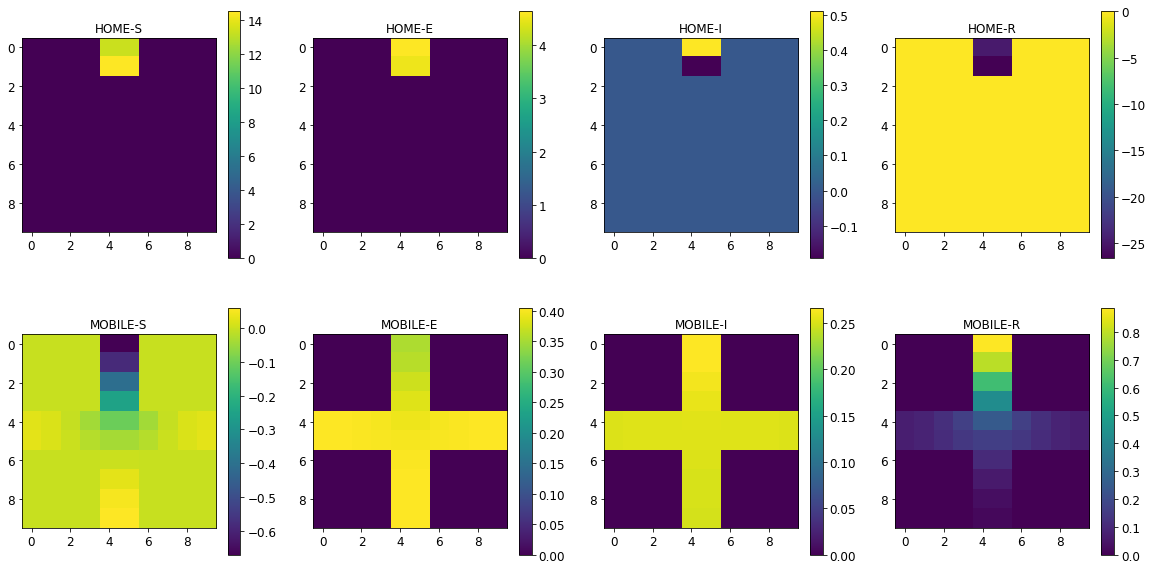

In [34]:
fig, ax = plt.subplots(2,4, figsize=[20,10])
for i, group in enumerate(groups):
    im = ax.flatten()[i].imshow(X_generated.reshape(ntimes,len(groups),nl,nc)[-1,i,:,:]
                                -X_real.reshape(ntimes,len(groups),nl,nc)[-1,i,:,:])
    fig.colorbar(im, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(group)
#plt.savefig('GAN_generateddata_mesh.png')

## Predict multiple points

In [35]:
def mse_loss(inp, outp):
    inp = tf.reshape(inp, [-1, codings_size])*tf.math.sqrt(weight)
    outp = tf.reshape(outp, [-1, codings_size])*tf.math.sqrt(weight)
    return tf.reduce_mean(tf.math.squared_difference(inp, outp))

def optimize_coding(latent_values, real_coding, epochs=1000):
    
    optimizer = tf.keras.optimizers.Adam(1e-2)
    
    @tf.function
    def opt_step(latent_values, real_coding):
        with tf.GradientTape() as tape:
            tape.watch(latent_values)
            gen_output = generator(latent_values, training=False) 
            loss = mse_loss(real_coding, gen_output[:,:(ntimes - 1),:,:])   

        gradient = tape.gradient(loss, latent_values)  
        optimizer.apply_gradients(zip([gradient], [latent_values]))  

        return loss
    
    loss = []
    for epoch in range(epochs):
        loss.append(opt_step(latent_values, real_coding).numpy())
        
    plt.plot(loss)
    #plt.grid()
    plt.show
        
    return latent_values, loss[-1]  #returns the optimized input that generates the desired output

### Test Run 2

Initial point losses: [86.21799, 86.79869, 1611.4175, 1605.0049, 86.327774, 86.797264, 1609.4886, 86.52418, 1607.5404, 86.71467]


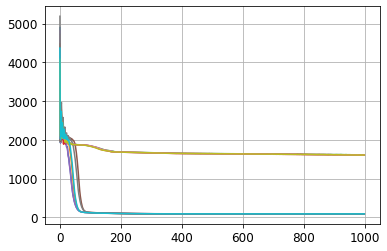

In [36]:
np.random.seed(42)
tf.random.set_seed(42)

run = 2
lag = 446
n = len(times)*run - ntimes*step*run + lag
nplot = n + run*ntimes*step 

real_coding = X_test_concat[n].reshape(1,-1)
real_coding = real_coding[:,:codings_size*(ntimes - 1)]
real_coding = tf.constant(real_coding)
real_coding = tf.cast(real_coding, dtype=tf.float32)
R0s_run = real_coding[0,-2:]

list_latent_values = []
list_loss = []
for _ in range(10):
    latent_values = tf.random.normal([len(real_coding), latent_size], mean=0.0, stddev=0.01)  
    latent_values = tf.Variable(latent_values)     
    latent_values, loss = optimize_coding(latent_values, real_coding, epochs=1000)
    list_latent_values.append(latent_values)
    list_loss.append(loss)
latent_values = list_latent_values[np.argmin(list_loss)]
print('Initial point losses: ', end='')
print(list_loss)
        
X_predict = list(generator(latent_values).numpy().reshape(-1,codings_size))
gen_predict = X_predict[-1]
gen_predict[-2:] = R0s_run

real_coding = np.concatenate((real_coding, gen_predict.reshape(1,-1)), axis=1)[:,codings_size:]
real_coding = tf.constant(real_coding)
real_coding = tf.cast(real_coding, dtype=tf.float32)

for i in range(0): #range(2000,len(X_train_concat)-1):
    start = time.time()
    latent_values, loss = optimize_coding(latent_values, real_coding, epochs=1000)
    print('Loss iteration '+str(i+1)+': '+str(loss), end=' - ')
        
    gen_predict = generator(latent_values)[:,(ntimes - 1):,:,:].numpy().flatten()
    X_predict.append(gen_predict)
    gen_predict[-2:] = R0s_run
    
    real_coding = np.concatenate((real_coding, gen_predict.reshape(1,-1)), axis=1)[:,codings_size:]
    real_coding = tf.constant(real_coding)
    real_coding = tf.cast(real_coding, dtype=tf.float32)
    print ('{:.0f}s'.format( time.time()-start))
    
X_predict = np.array(X_predict)
plt.grid()

In [37]:
X_generated = scaler.inverse_transform(X_predict)
R0_generated = X_generated[:,pca_size:]
X_generated = pca_compress.inverse_transform(X_generated[:,:pca_size])
X_generated = X_generated.reshape(len(X_predict), len(groups)*nl*nc)
X_generated[X_generated<0] = 0 

In [38]:
X_real = scaler.inverse_transform(X_test_concat_flatten[n].reshape(ntimes,codings_size))
R0_real = X_real[:,pca_size:]

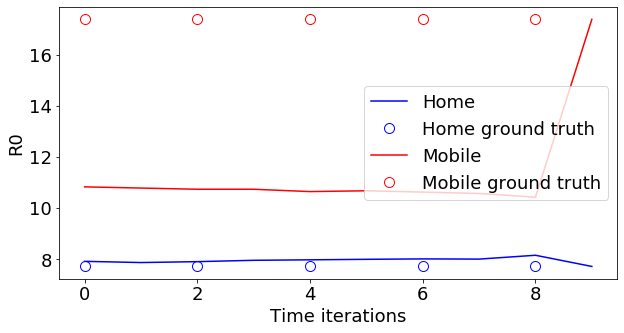

In [39]:
mpl.rcParams.update({'font.size': 18})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=18)
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(R0_generated[:,0], 'b-')
ax.plot(list(R0_real[0,:1])*len(R0_generated), 'bo', markevery=2, fillstyle='none', markersize = 10)
ax.plot(R0_generated[:,1], 'r-')
ax.plot(list(R0_real[0,1:])*len(R0_generated), 'ro', markevery=2, fillstyle='none', markersize = 10)
ax.set_xlabel('Time iterations')
ax.set_ylabel('R0')
ax.legend(['Home', 'Home ground truth', 'Mobile', 'Mobile ground truth',])
#plt.grid()
#plt.savefig('run2test_nrun2_r0_1ts.eps');

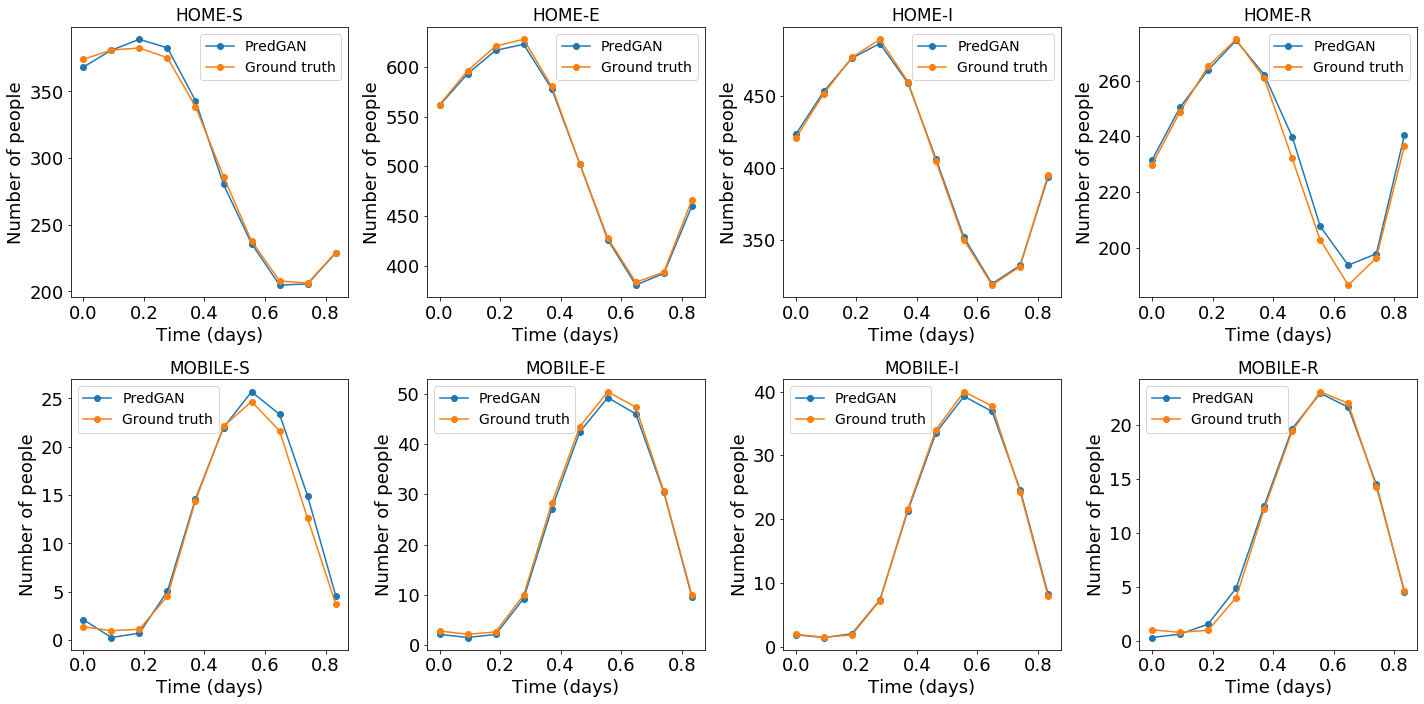

In [40]:
mpl.rcParams.update({'font.size': 14})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=18)
fig, ax = plt.subplots(2,4, figsize=[20,10])
for i, group in enumerate(groups):
    ax.flatten()[i].plot(np.linspace(0,9*8000/86400,10), X_generated[:(ntimes-1)+1,i*nl*nc+4], '-o')
    ax.flatten()[i].plot(np.linspace(0,9*8000/86400,10), X_test_1D[nplot:nplot+((ntimes-1)+1)*step:step,i*nl*nc+4], '-o')
    #ax.flatten()[i].plot(np.linspace(0,9*8000/86400,9), X_test_1D[nplot:nplot+((ntimes-1))*step:step,i*nl*nc+4], 'o', fillstyle='none', markersize = 10)
    ax.flatten()[i].set_title(group)
    ax.flatten()[i].set_xlabel('Time (days)')
    ax.flatten()[i].set_ylabel('Number of people')
    #ax.flatten()[i].legend(['Prediction', 'Ground truth', 'Start points'])
    ax.flatten()[i].legend(['PredGAN','Ground truth'])
plt.tight_layout()
#plt.savefig('run2test_nrun2c_1ts.eps')

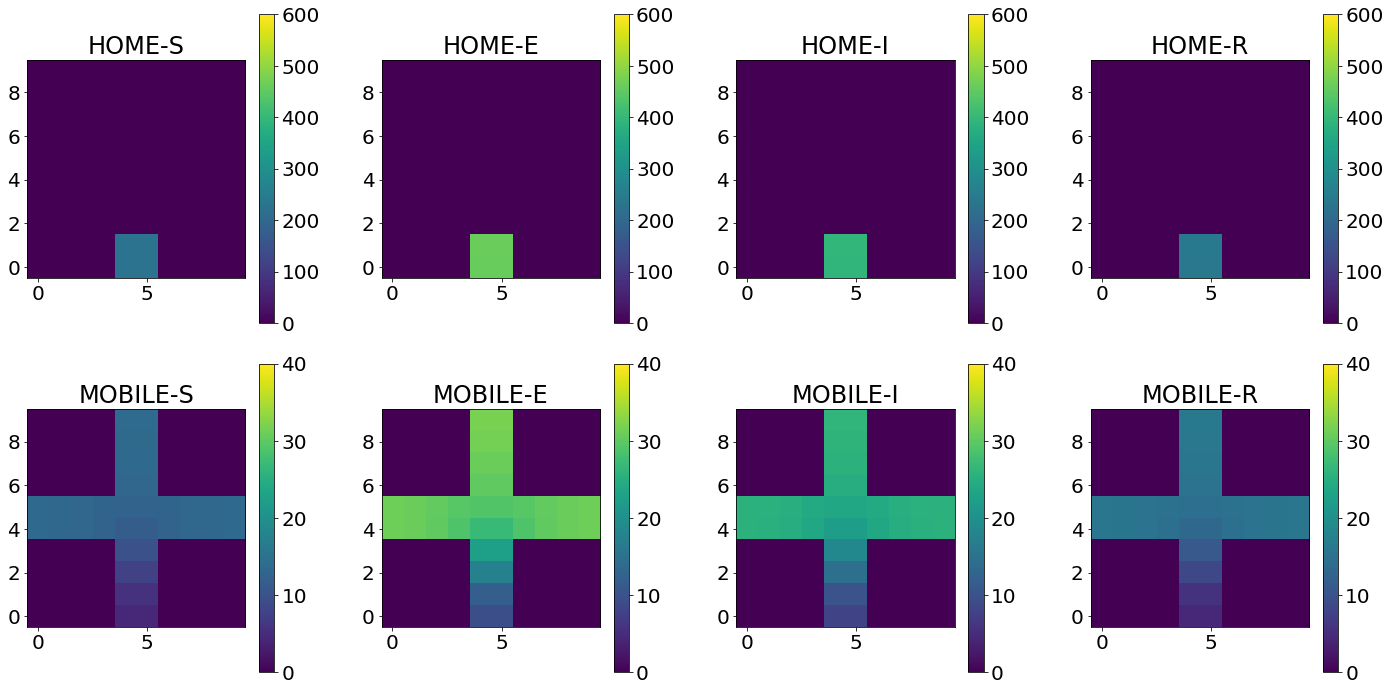

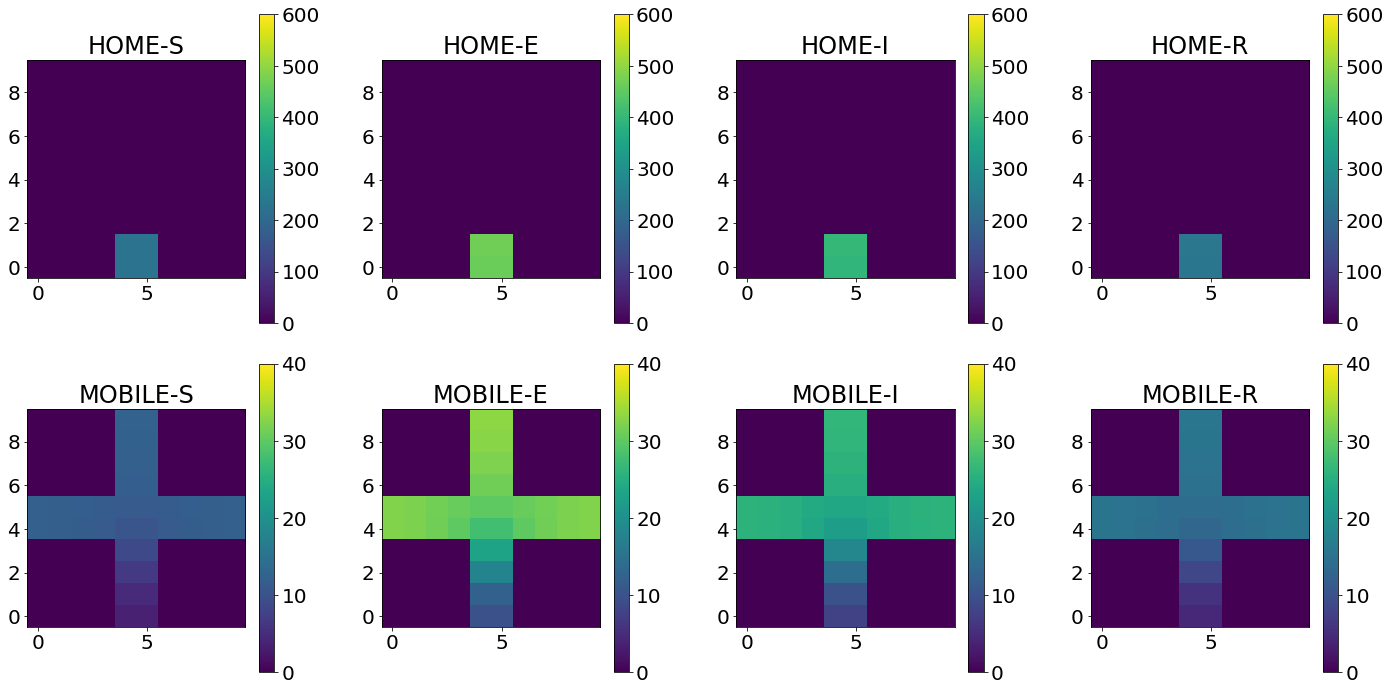

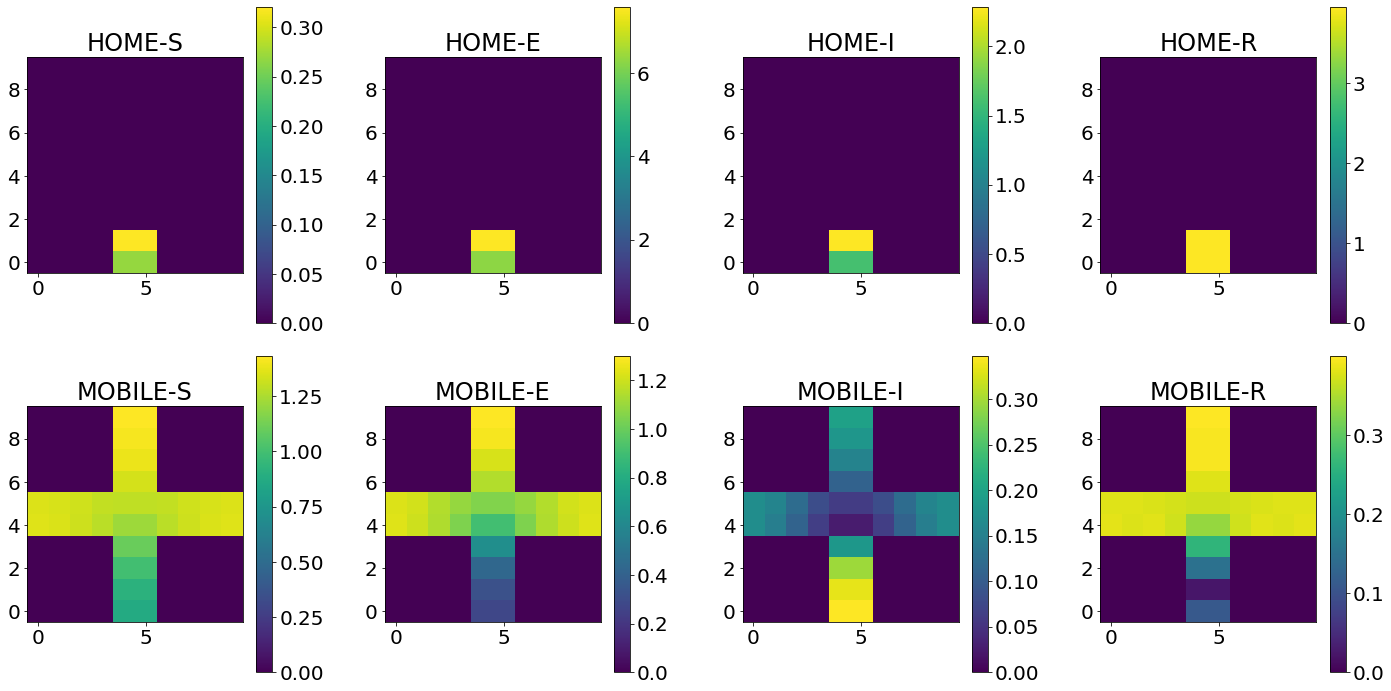

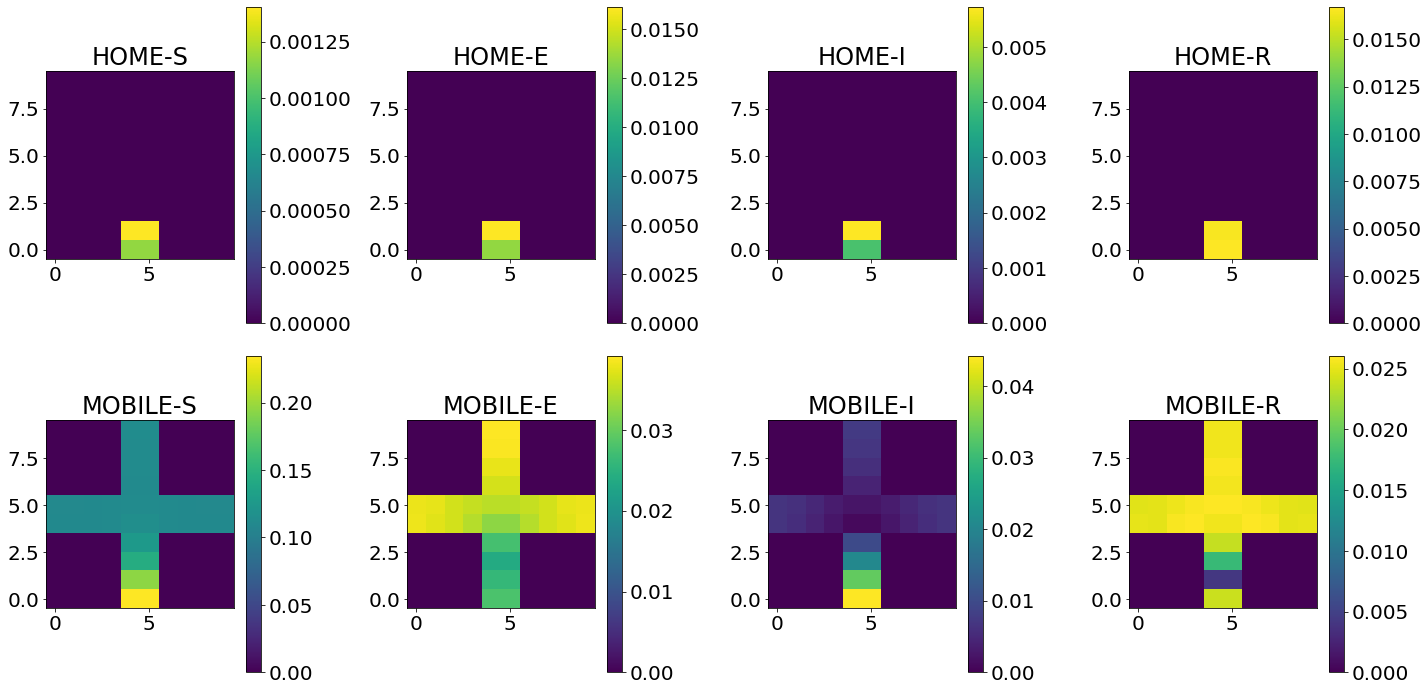

In [41]:
time_step = 9

#
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('axes', labelsize=20) 
fig, ax = plt.subplots(2,4, figsize=[20,10])
lvmin = [0]*8
lvmax = [600]*4 + [40]*4
for i, group in enumerate(groups):
    im = ax.flatten()[i].imshow(X_generated[time_step,:].reshape(1,len(groups),nl,nc)[0,i,:,:],
                                origin='lower',
                                vmin=lvmin[i], 
                                vmax=lvmax[i] )
    fig.colorbar(im, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(group)
plt.tight_layout()
#plt.savefig('run2test_nrun2_mesh60_1ts.eps')

#
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('axes', labelsize=20) 
fig, ax = plt.subplots(2,4, figsize=[20,10])
#lvmin = [0]*8
#lvmax = [600]*4 + [50]*4
for i, group in enumerate(groups):
    im = ax.flatten()[i].imshow(X_test_1D[nplot+time_step*step,:].reshape(1,len(groups),nl,nc)[0,i,:,:],
                                origin='lower',
                                vmin=lvmin[i], 
                                vmax=lvmax[i] )                                
    fig.colorbar(im, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(group)
plt.tight_layout()
#plt.savefig('run2test_nrun2_mesh60_real_1ts.eps')

#
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('axes', labelsize=20) 
fig, ax = plt.subplots(2,4, figsize=[20,10])
for i, group in enumerate(groups):
    im = ax.flatten()[i].imshow(abs(X_test_1D[nplot+time_step*step,:].reshape(1,len(groups),nl,nc)[0,i,:,:]-
                                X_generated[time_step,:].reshape(1,len(groups),nl,nc)[0,i,:,:]),
                                origin='lower')                                
    fig.colorbar(im, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(group)
plt.tight_layout()
#plt.savefig('run2test_nrun2_mesh60_diff_1ts.eps')


#
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('axes', labelsize=20) 
fig, ax = plt.subplots(2,4, figsize=[20,10])
for i, group in enumerate(groups):
    im = ax.flatten()[i].imshow(abs(X_test_1D[nplot+time_step*step,:].reshape(1,len(groups),nl,nc)[0,i,:,:]-
                                X_generated[time_step,:].reshape(1,len(groups),nl,nc)[0,i,:,:])/
                                (X_test_1D[nplot+time_step*step,:].reshape(1,len(groups),nl,nc)[0,i,:,:]+1e-6),
                                origin='lower')                                
    fig.colorbar(im, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(group)
plt.tight_layout()
#plt.savefig('run2test_nrun2_mesh60_rdiff_1ts.eps')

In [42]:
print('mean square error: ',np.sum((X_test_1D[nplot+time_step*step,:].reshape(1,len(groups),nl,nc)[0,:,:,:]
    -X_generated[time_step,:].reshape(1,len(groups),nl,nc)[0,:,:,:])**2)
    /np.size(X_generated[time_step,:].reshape(1,len(groups),nl,nc)[0,:,:,:]))
print('mean absolute error: ',np.sum(abs(X_test_1D[nplot+time_step*step,:].reshape(1,len(groups),nl,nc)[0,:,:,:]
    -X_generated[time_step,:].reshape(1,len(groups),nl,nc)[0,:,:,:]))
    /np.size(X_generated[time_step,:].reshape(1,len(groups),nl,nc)[0,:,:,:]))
print('relative mean absolute error: ',np.sum(abs(X_test_1D[nplot+time_step*step,:].reshape(1,len(groups),nl,nc)[0,:,:,:]
    -X_generated[time_step,:].reshape(1,len(groups),nl,nc)[0,:,:,:])/(X_test_1D[nplot+time_step*step,:].reshape(1,len(groups),nl,nc)[0,:,:,:]+1e-12))
    /np.size(X_generated[time_step,:].reshape(1,len(groups),nl,nc)[0,:,:,:]))

mean square error:  0.46875869374659873
mean absolute error:  0.18885242020114293
relative mean absolute error:  0.008956524208606225


Initial point losses: [89.73182, 89.82175, 90.04524, 89.71799, 89.852554, 89.95286, 89.923615, 89.86327, 90.05873, 89.73536]
Loss iteration 1: 90.1078 - 3s
Loss iteration 2: 81.688614 - 3s
Loss iteration 3: 82.32862 - 3s
Loss iteration 4: 78.190865 - 3s
Loss iteration 5: 75.09434 - 3s
Loss iteration 6: 72.72123 - 3s
Loss iteration 7: 68.487595 - 3s
Loss iteration 8: 66.74103 - 3s
Loss iteration 9: 64.113846 - 3s
Loss iteration 10: 57.340366 - 3s
Loss iteration 11: 58.871075 - 3s
Loss iteration 12: 6.969583 - 3s
Loss iteration 13: 7.778945 - 3s
Loss iteration 14: 7.4638777 - 3s
Loss iteration 15: 10.959682 - 3s
Loss iteration 16: 5.276392 - 3s
Loss iteration 17: 5.5703244 - 3s
Loss iteration 18: 9.616769 - 3s
Loss iteration 19: 6.086476 - 3s
Loss iteration 20: 8.628551 - 3s
Loss iteration 21: 6.7919827 - 3s
Loss iteration 22: 7.0565624 - 3s
Loss iteration 23: 6.9540777 - 3s
Loss iteration 24: 5.3427653 - 3s
Loss iteration 25: 7.1875534 - 3s
Loss iteration 26: 6.6183653 - 3s
Loss iterati

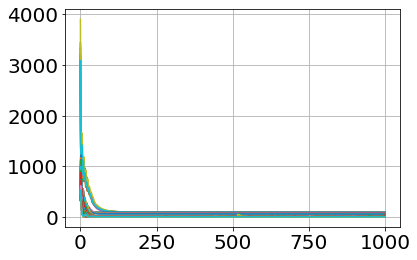

In [43]:
np.random.seed(0)
tf.random.set_seed(0)

run = 2
lag = 360
n = len(times)*run - ntimes*step*run + lag
nplot = n + run*ntimes*step 

real_coding = X_test_concat[n].reshape(1,-1)
real_coding = real_coding[:,:codings_size*(ntimes - 1)]
real_coding = tf.constant(real_coding)
real_coding = tf.cast(real_coding, dtype=tf.float32)
R0s_run = real_coding[0,-2:]

list_latent_values = []
list_loss = []
for _ in range(10):
    latent_values = tf.random.normal([len(real_coding), latent_size], mean=0.0, stddev=0.01)  
    latent_values = tf.Variable(latent_values)     
    latent_values, loss = optimize_coding(latent_values, real_coding, epochs=1000)
    list_latent_values.append(latent_values)
    list_loss.append(loss)
latent_values = list_latent_values[np.argmin(list_loss)]
print('Initial point losses: ', end='')
print(list_loss)
        
X_predict = list(generator(latent_values).numpy().reshape(-1,codings_size))
gen_predict = X_predict[-1]
gen_predict[-2:] = R0s_run

real_coding = np.concatenate((real_coding, gen_predict.reshape(1,-1)), axis=1)[:,codings_size:]
real_coding = tf.constant(real_coding)
real_coding = tf.cast(real_coding, dtype=tf.float32)

for i in range(100): #range(2000,len(X_train_concat)-1):
    start = time.time()
    latent_values, loss = optimize_coding(latent_values, real_coding, epochs=1000)
    print('Loss iteration '+str(i+1)+': '+str(loss), end=' - ')
        
    gen_predict = generator(latent_values)[:,(ntimes - 1):,:,:].numpy().flatten()
    X_predict.append(gen_predict)
    gen_predict[-2:] = R0s_run
    
    real_coding = np.concatenate((real_coding, gen_predict.reshape(1,-1)), axis=1)[:,codings_size:]
    real_coding = tf.constant(real_coding)
    real_coding = tf.cast(real_coding, dtype=tf.float32)
    print ('{:.0f}s'.format( time.time()-start))
    
X_predict = np.array(X_predict)
plt.grid()

In [44]:
X_generated = scaler.inverse_transform(X_predict)
R0_generated = X_generated[:,pca_size:]
X_generated = pca_compress.inverse_transform(X_generated[:,:pca_size])
X_generated = X_generated.reshape(len(X_predict), len(groups)*nl*nc)
X_generated[X_generated<0] = 0 

In [45]:
X_real = scaler.inverse_transform(X_test_concat_flatten[n].reshape(ntimes,codings_size))
R0_real = X_real[:,pca_size:]

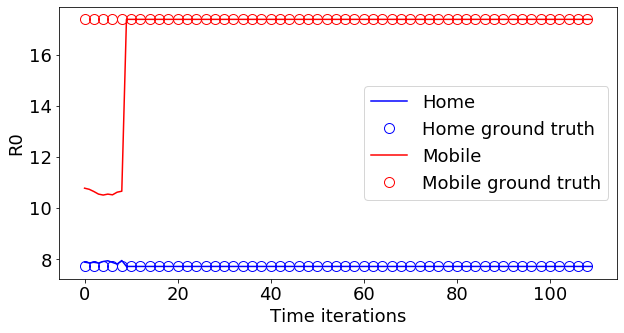

In [46]:
mpl.rcParams.update({'font.size': 18})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=18)
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(R0_generated[:,0], 'b-')
ax.plot(list(R0_real[0,:1])*len(R0_generated), 'bo', markevery=2, fillstyle='none', markersize = 10)
ax.plot(R0_generated[:,1], 'r-')
ax.plot(list(R0_real[0,1:])*len(R0_generated), 'ro', markevery=2, fillstyle='none', markersize = 10)
ax.set_xlabel('Time iterations')
ax.set_ylabel('R0')
ax.legend(['Home', 'Home ground truth', 'Mobile', 'Mobile ground truth',])
#plt.grid()
#plt.savefig('run2test_nrun2_r0.eps');

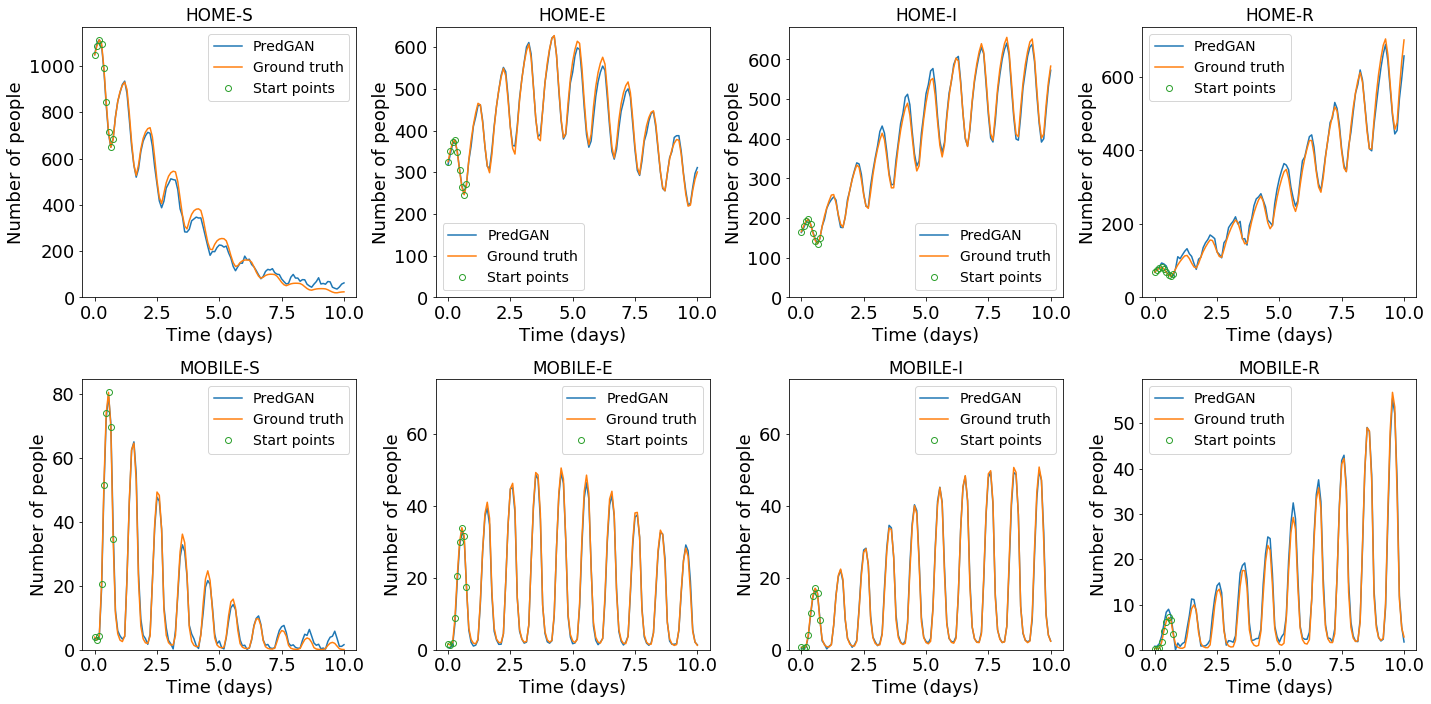

In [47]:
mpl.rcParams.update({'font.size': 14})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=18)
fig, ax = plt.subplots(2,4, figsize=[20,10])
for i, group in enumerate(groups):
    ax.flatten()[i].plot(np.linspace(0,((ntimes-2)+100)*8000/86400,((ntimes-1)+100)), X_generated[:(ntimes-1)+100,i*nl*nc+4], '-')
    ax.flatten()[i].plot(np.linspace(0,((ntimes-2)+100)*8000/86400,((ntimes-1)+100)), X_test_1D[nplot:nplot+((ntimes-1)+100)*step:step,i*nl*nc+4], '-')
    ax.flatten()[i].plot(np.linspace(0,(ntimes-2)*8000/86400,(ntimes-1)), X_test_1D[nplot:nplot+((ntimes-1))*step:step,i*nl*nc+4], 'o', fillstyle='none', markersize = 6)
    ax.flatten()[i].set_ylim(bottom=0)
    if group in ['MOBILE-E','MOBILE-I']:
        ax.flatten()[i].set_ylim(top=75)
    ax.flatten()[i].set_title(group)
    ax.flatten()[i].set_xlabel('Time (days)')
    ax.flatten()[i].set_ylabel('Number of people')
    ax.flatten()[i].legend(['PredGAN', 'Ground truth', 'Start points'])
plt.tight_layout()
#plt.savefig('run2test_nrun2c.eps')

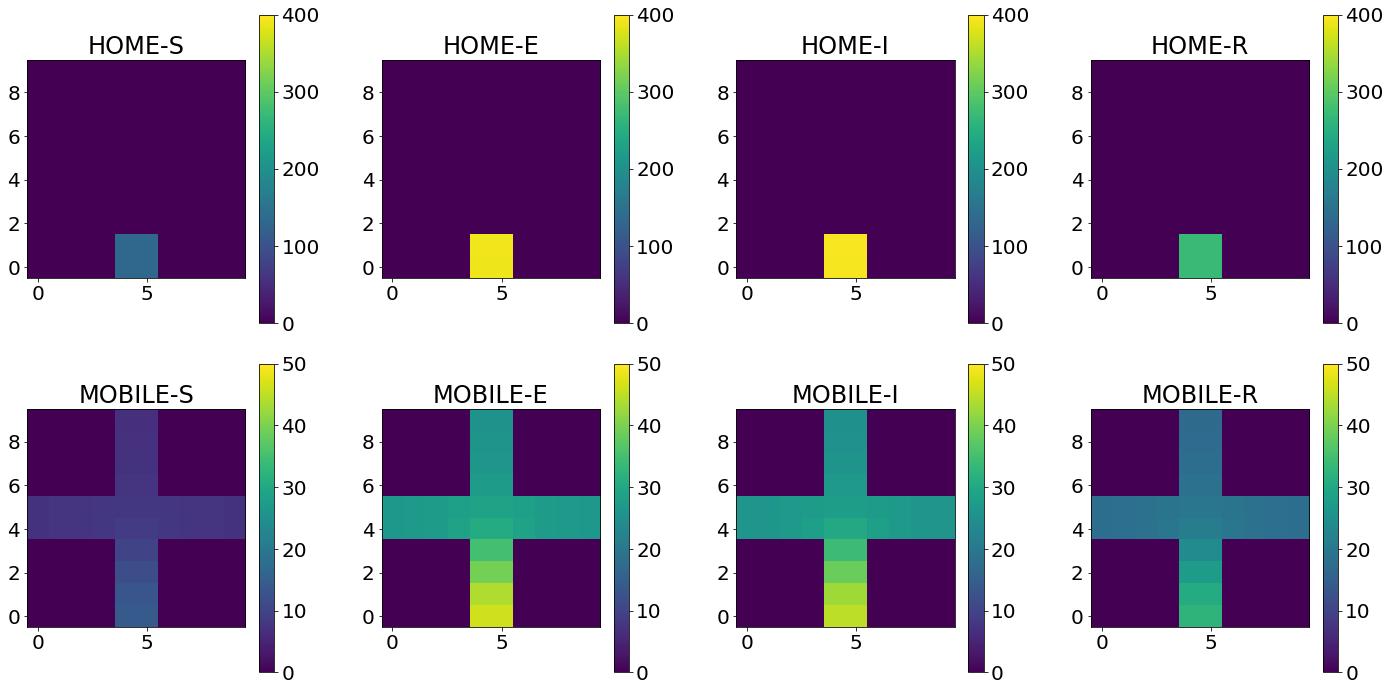

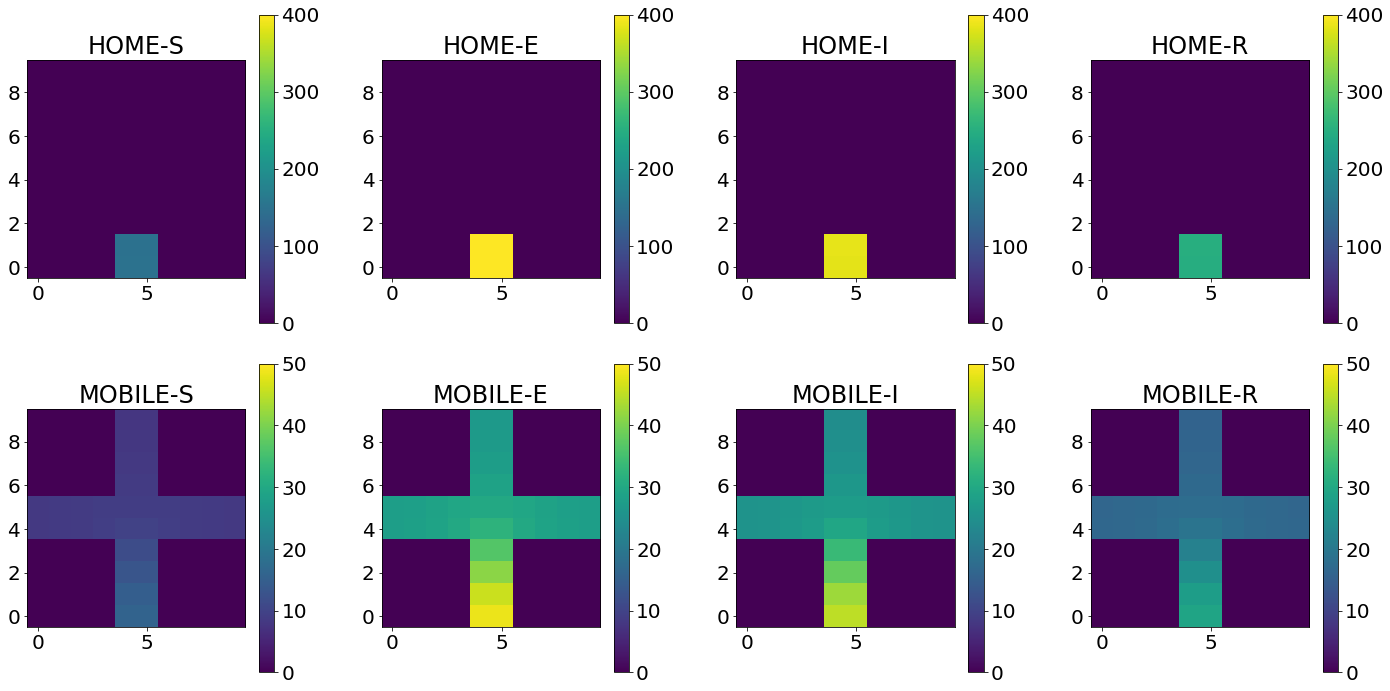

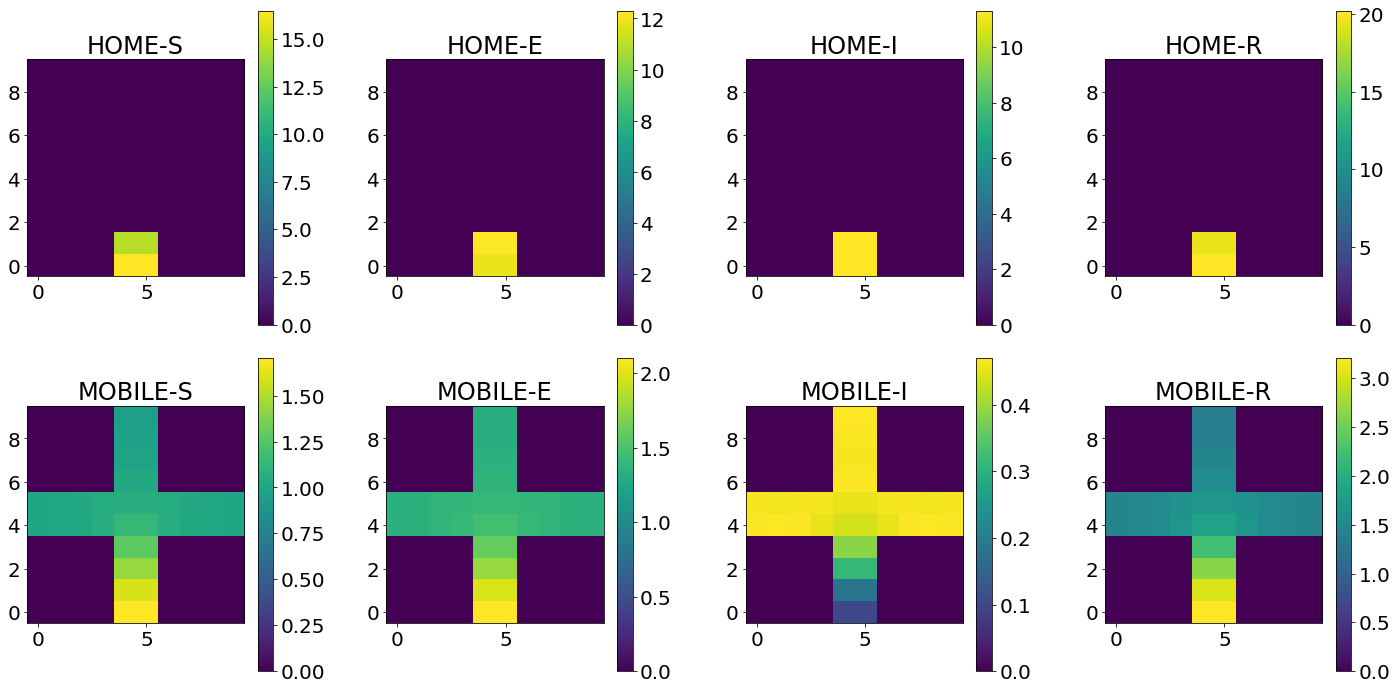

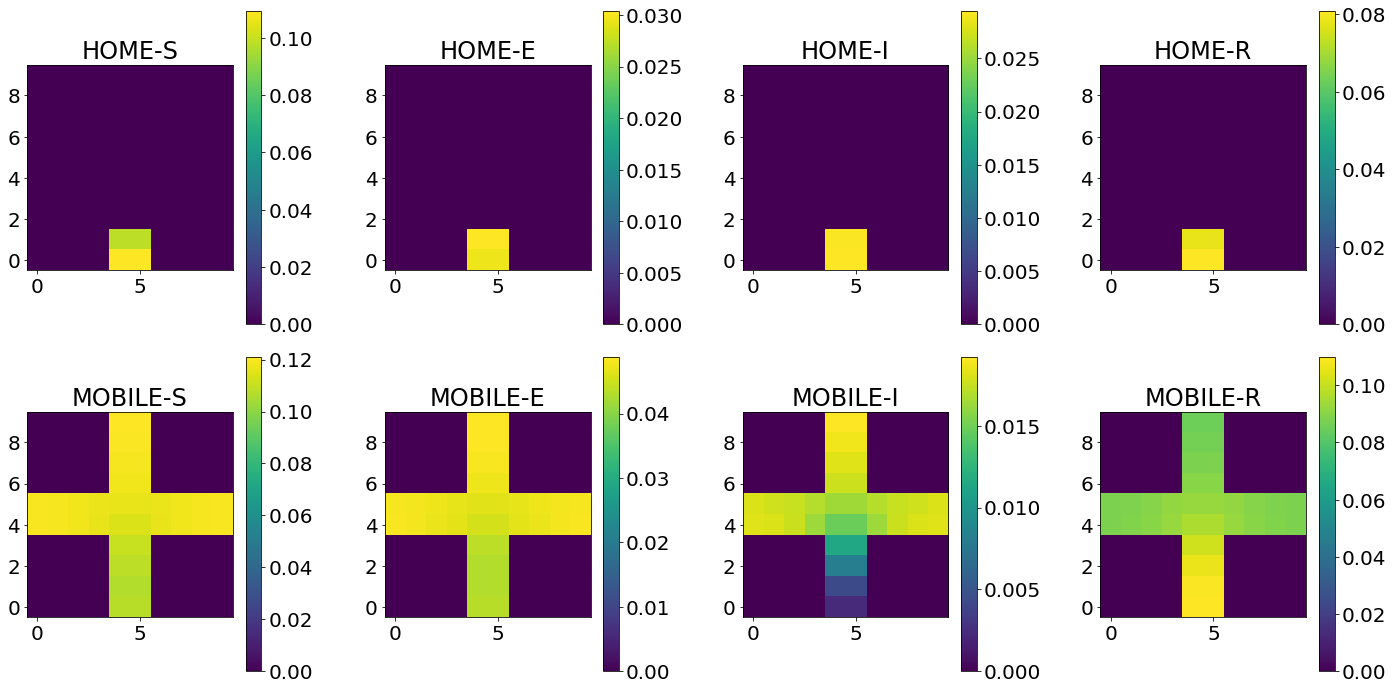

In [48]:
time_step = 60

#
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('axes', labelsize=20) 
fig, ax = plt.subplots(2,4, figsize=[20,10])
lvmin = [0]*8
lvmax = [400]*4 + [50]*4
for i, group in enumerate(groups):
    im = ax.flatten()[i].imshow(X_generated[time_step,:].reshape(1,len(groups),nl,nc)[0,i,:,:],
                                origin='lower',
                                vmin=lvmin[i], 
                                vmax=lvmax[i] )
    fig.colorbar(im, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(group)
plt.tight_layout()
#plt.savefig('run2test_nrun2_mesh60.eps')

#
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('axes', labelsize=20) 
fig, ax = plt.subplots(2,4, figsize=[20,10])
lvmin = [0]*8
lvmax = [400]*4 + [50]*4
for i, group in enumerate(groups):
    im = ax.flatten()[i].imshow(X_test_1D[nplot+time_step*step,:].reshape(1,len(groups),nl,nc)[0,i,:,:],
                                origin='lower',
                                vmin=lvmin[i], 
                                vmax=lvmax[i] )                                
    fig.colorbar(im, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(group)
plt.tight_layout()
#plt.savefig('run2test_nrun2_mesh60_real.eps')

#
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('axes', labelsize=20) 
fig, ax = plt.subplots(2,4, figsize=[20,10])
for i, group in enumerate(groups):
    im = ax.flatten()[i].imshow(abs(X_test_1D[nplot+time_step*step,:].reshape(1,len(groups),nl,nc)[0,i,:,:]-
                                X_generated[time_step,:].reshape(1,len(groups),nl,nc)[0,i,:,:]),
                                origin='lower')                                
    fig.colorbar(im, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(group)
plt.tight_layout()
#plt.savefig('run2test_nrun2_mesh60_diff.eps')


#
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
mpl.rc('axes', labelsize=20) 
fig, ax = plt.subplots(2,4, figsize=[20,10])
for i, group in enumerate(groups):
    im = ax.flatten()[i].imshow(abs(X_test_1D[nplot+time_step*step,:].reshape(1,len(groups),nl,nc)[0,i,:,:]-
                                X_generated[time_step,:].reshape(1,len(groups),nl,nc)[0,i,:,:])/
                                (X_test_1D[nplot+time_step*step,:].reshape(1,len(groups),nl,nc)[0,i,:,:]+1e-6),
                                origin='lower')                                
    fig.colorbar(im, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(group)
plt.tight_layout()
#plt.savefig('run2test_nrun2_mesh60_rdiff.eps')

### Test run 16

Initial point losses: [12.257375, 11.515046, 11.669124, 11.519763, 12.823821, 11.412746, 11.550537, 11.516901, 12.515573, 11.46824]
Loss iteration 1: 1.0341724 - 3s
Loss iteration 2: 0.94529486 - 3s
Loss iteration 3: 2.6427789 - 3s
Loss iteration 4: 2.580523 - 3s
Loss iteration 5: 6.7343154 - 3s
Loss iteration 6: 3.9249866 - 3s
Loss iteration 7: 3.2861352 - 3s
Loss iteration 8: 3.3621192 - 3s
Loss iteration 9: 3.374008 - 3s
Loss iteration 10: 3.9488082 - 3s
Loss iteration 11: 3.3251667 - 3s
Loss iteration 12: 3.3986213 - 3s
Loss iteration 13: 2.005017 - 3s
Loss iteration 14: 2.14712 - 3s
Loss iteration 15: 2.8204622 - 3s
Loss iteration 16: 4.9229975 - 3s
Loss iteration 17: 2.578044 - 3s
Loss iteration 18: 3.3075507 - 3s
Loss iteration 19: 2.7596543 - 2s
Loss iteration 20: 3.6164095 - 3s
Loss iteration 21: 3.0989459 - 3s
Loss iteration 22: 3.7926416 - 3s
Loss iteration 23: 5.1532526 - 3s
Loss iteration 24: 2.9054956 - 3s
Loss iteration 25: 1.8196237 - 3s
Loss iteration 26: 2.6528516 - 3

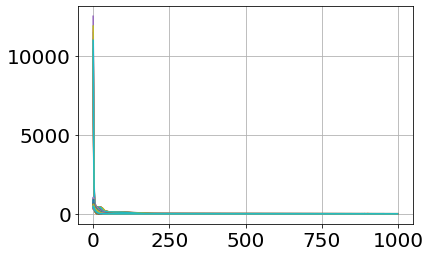

In [49]:
np.random.seed(0)
tf.random.set_seed(0)

run = 16
lag = 200
n = len(times)*run - ntimes*step*run + lag
nplot = n + run*ntimes*step

real_coding = X_test_concat[n].reshape(1,-1)
real_coding = real_coding[:,:codings_size*(ntimes - 1)]
real_coding = tf.constant(real_coding)
real_coding = tf.cast(real_coding, dtype=tf.float32)
R0s_run = real_coding[0,-2:]

list_latent_values = []
list_loss = []
for _ in range(10):
    latent_values = tf.random.normal([len(real_coding), latent_size], mean=0.0, stddev=0.01)  
    latent_values = tf.Variable(latent_values)     
    latent_values, loss = optimize_coding(latent_values, real_coding, epochs=1000)
    list_latent_values.append(latent_values)
    list_loss.append(loss)
latent_values = list_latent_values[np.argmin(list_loss)]
print('Initial point losses: ', end='')
print(list_loss)
        
X_predict = list(generator(latent_values).numpy().reshape(-1,codings_size))
gen_predict = X_predict[-1]
gen_predict[-2:] = R0s_run

real_coding = np.concatenate((real_coding, gen_predict.reshape(1,-1)), axis=1)[:,codings_size:]
real_coding = tf.constant(real_coding)
real_coding = tf.cast(real_coding, dtype=tf.float32)

for i in range(100): #range(2000,len(X_train_concat)-1):
    start = time.time()
    latent_values, loss = optimize_coding(latent_values, real_coding, epochs=1000)
    print('Loss iteration '+str(i+1)+': '+str(loss), end=' - ')
     
    gen_predict = generator(latent_values)[:,(ntimes - 1):,:,:].numpy().flatten()
    X_predict.append(gen_predict)
    gen_predict[-2:] = R0s_run
    
    real_coding = np.concatenate((real_coding, gen_predict.reshape(1,-1)), axis=1)[:,codings_size:]
    real_coding = tf.constant(real_coding)
    real_coding = tf.cast(real_coding, dtype=tf.float32)
    print ('{:.0f}s'.format( time.time()-start))
    
X_predict = np.array(X_predict)
plt.grid()

In [50]:
X_generated = scaler.inverse_transform(X_predict)
R0_generated = X_generated[:,pca_size:]
X_generated = pca_compress.inverse_transform(X_generated[:,:pca_size])
X_generated = X_generated.reshape(len(X_predict), len(groups)*nl*nc)
X_generated[X_generated<0] = 0 

In [51]:
X_real = scaler.inverse_transform(X_test_concat_flatten[n].reshape(ntimes,codings_size))
R0_real = X_real[:,pca_size:]

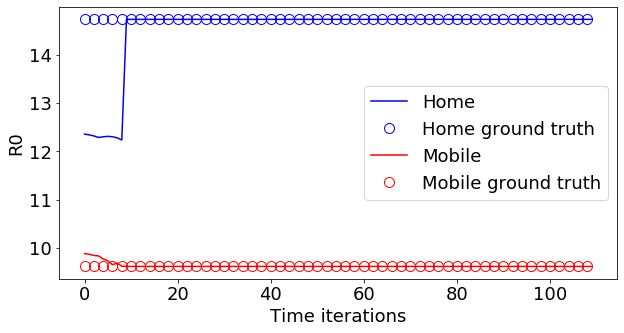

In [52]:
mpl.rcParams.update({'font.size': 18})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=18)
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(R0_generated[:,0], 'b-')
ax.plot(list(R0_real[0,:1])*len(R0_generated), 'bo', markevery=2, fillstyle='none', markersize = 10)
ax.plot(R0_generated[:,1], 'r-')
ax.plot(list(R0_real[0,1:])*len(R0_generated), 'ro', markevery=2, fillstyle='none', markersize = 10)
ax.set_xlabel('Time iterations')
ax.set_ylabel('R0')
ax.legend(['Home', 'Home ground truth', 'Mobile', 'Mobile ground truth',])
#plt.grid()
#plt.savefig('run2test_nrun16_r0.eps');

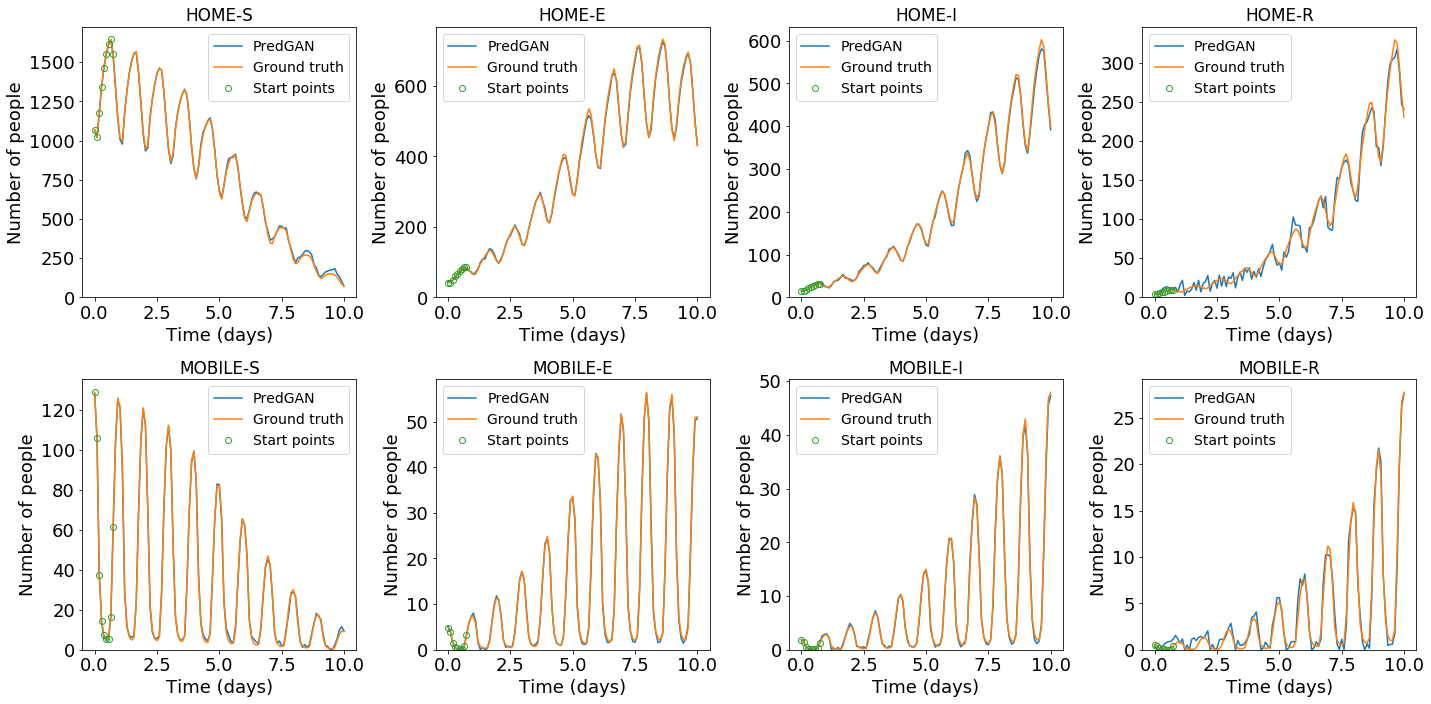

In [53]:
mpl.rcParams.update({'font.size': 14})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=18)
fig, ax = plt.subplots(2,4, figsize=[20,10])
for i, group in enumerate(groups):
    ax.flatten()[i].plot(np.linspace(0,((ntimes-2)+100)*8000/86400,((ntimes-1)+100)), X_generated[:(ntimes-1)+100,i*nl*nc+4], '-')
    ax.flatten()[i].plot(np.linspace(0,((ntimes-2)+100)*8000/86400,((ntimes-1)+100)), X_test_1D[nplot:nplot+((ntimes-1)+100)*step:step,i*nl*nc+4], '-')
    ax.flatten()[i].plot(np.linspace(0,(ntimes-2)*8000/86400,(ntimes-1)), X_test_1D[nplot:nplot+((ntimes-1))*step:step,i*nl*nc+4], 'o', fillstyle='none', markersize = 6)
    ax.flatten()[i].set_ylim(bottom=0)
    #if group in ['MOBILE-E','MOBILE-I']:
    #    ax.flatten()[i].set_ylim(top=75)
    ax.flatten()[i].set_title(group)
    ax.flatten()[i].set_xlabel('Time (days)')
    ax.flatten()[i].set_ylabel('Number of people')
    ax.flatten()[i].legend(['PredGAN', 'Ground truth', 'Start points'])
plt.tight_layout()
#plt.savefig('run2test_nrun16c.eps')

### Test run 17

Initial point losses: [4.27036, 4.2778893, 4.2513614, 4.5251813, 4.284953, 4.238807, 4.2760305, 4.3069925, 4.313069, 10.145636]
Loss iteration 1: 1.9398493 - 3s
Loss iteration 2: 4.0421863 - 3s
Loss iteration 3: 3.0217423 - 3s
Loss iteration 4: 2.3836162 - 3s
Loss iteration 5: 2.8707106 - 3s
Loss iteration 6: 3.5283406 - 3s
Loss iteration 7: 5.9676366 - 3s
Loss iteration 8: 5.7803206 - 3s
Loss iteration 9: 7.510273 - 3s
Loss iteration 10: 4.453707 - 3s
Loss iteration 11: 8.675419 - 3s
Loss iteration 12: 3.6507149 - 3s
Loss iteration 13: 7.392709 - 3s
Loss iteration 14: 4.540488 - 3s
Loss iteration 15: 4.1401916 - 3s
Loss iteration 16: 5.760054 - 3s
Loss iteration 17: 6.225867 - 3s
Loss iteration 18: 4.964394 - 3s
Loss iteration 19: 3.2475696 - 3s
Loss iteration 20: 4.1712546 - 3s
Loss iteration 21: 6.8157897 - 3s
Loss iteration 22: 4.2401633 - 3s
Loss iteration 23: 5.435684 - 3s
Loss iteration 24: 7.3242564 - 3s
Loss iteration 25: 6.9772854 - 3s
Loss iteration 26: 5.472155 - 3s
Loss it

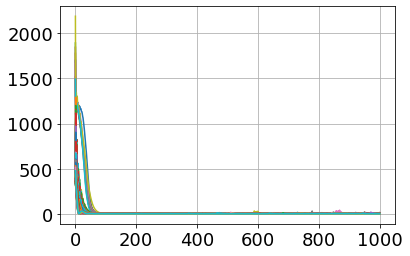

In [54]:
np.random.seed(0)
tf.random.set_seed(0)

run = 17
lag = 400
n = len(times)*run - ntimes*step*run + lag
nplot = n + run*ntimes*step 

real_coding = X_test_concat[n].reshape(1,-1)
real_coding = real_coding[:,:codings_size*(ntimes - 1)]
real_coding = tf.constant(real_coding)
real_coding = tf.cast(real_coding, dtype=tf.float32)
R0s_run = real_coding[0,-2:]

list_latent_values = []
list_loss = []
for _ in range(10):
    latent_values = tf.random.normal([len(real_coding), latent_size], mean=0.0, stddev=0.01)  
    latent_values = tf.Variable(latent_values)     
    latent_values, loss = optimize_coding(latent_values, real_coding, epochs=1000)
    list_latent_values.append(latent_values)
    list_loss.append(loss)
latent_values = list_latent_values[np.argmin(list_loss)]
print('Initial point losses: ', end='')
print(list_loss)
        
X_predict = list(generator(latent_values).numpy().reshape(-1,codings_size))
gen_predict = X_predict[-1]
gen_predict[-2:] = R0s_run

real_coding = np.concatenate((real_coding, gen_predict.reshape(1,-1)), axis=1)[:,codings_size:]
real_coding = tf.constant(real_coding)
real_coding = tf.cast(real_coding, dtype=tf.float32)

for i in range(100): #range(2000,len(X_train_concat)-1):
    start = time.time()
    latent_values, loss = optimize_coding(latent_values, real_coding, epochs=1000)
    print('Loss iteration '+str(i+1)+': '+str(loss), end=' - ')
      
    gen_predict = generator(latent_values)[:,(ntimes - 1):,:,:].numpy().flatten()
    X_predict.append(gen_predict)
    gen_predict[-2:] = R0s_run
    
    real_coding = np.concatenate((real_coding, gen_predict.reshape(1,-1)), axis=1)[:,codings_size:]
    real_coding = tf.constant(real_coding)
    real_coding = tf.cast(real_coding, dtype=tf.float32)
    print ('{:.0f}s'.format( time.time()-start))
    
X_predict = np.array(X_predict)
plt.grid()

In [55]:
X_generated = scaler.inverse_transform(X_predict)
R0_generated = X_generated[:,pca_size:]
X_generated = pca_compress.inverse_transform(X_generated[:,:pca_size])
X_generated = X_generated.reshape(len(X_predict), len(groups)*nl*nc)
X_generated[X_generated<0] = 0 

In [56]:
X_real = scaler.inverse_transform(X_test_concat_flatten[n].reshape(ntimes,codings_size))
R0_real = X_real[:,pca_size:]

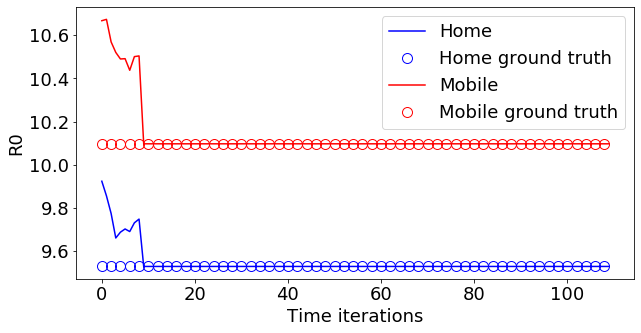

In [57]:
mpl.rcParams.update({'font.size': 18})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=18)
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(R0_generated[:,0], 'b-')
ax.plot(list(R0_real[0,:1])*len(R0_generated), 'bo', markevery=2, fillstyle='none', markersize = 10)
ax.plot(R0_generated[:,1], 'r-')
ax.plot(list(R0_real[0,1:])*len(R0_generated), 'ro', markevery=2, fillstyle='none', markersize = 10)
ax.set_xlabel('Time iterations')
ax.set_ylabel('R0')
ax.legend(['Home', 'Home ground truth', 'Mobile', 'Mobile ground truth',])
#plt.grid()
#plt.savefig('run2test_nrun17_r0.eps');

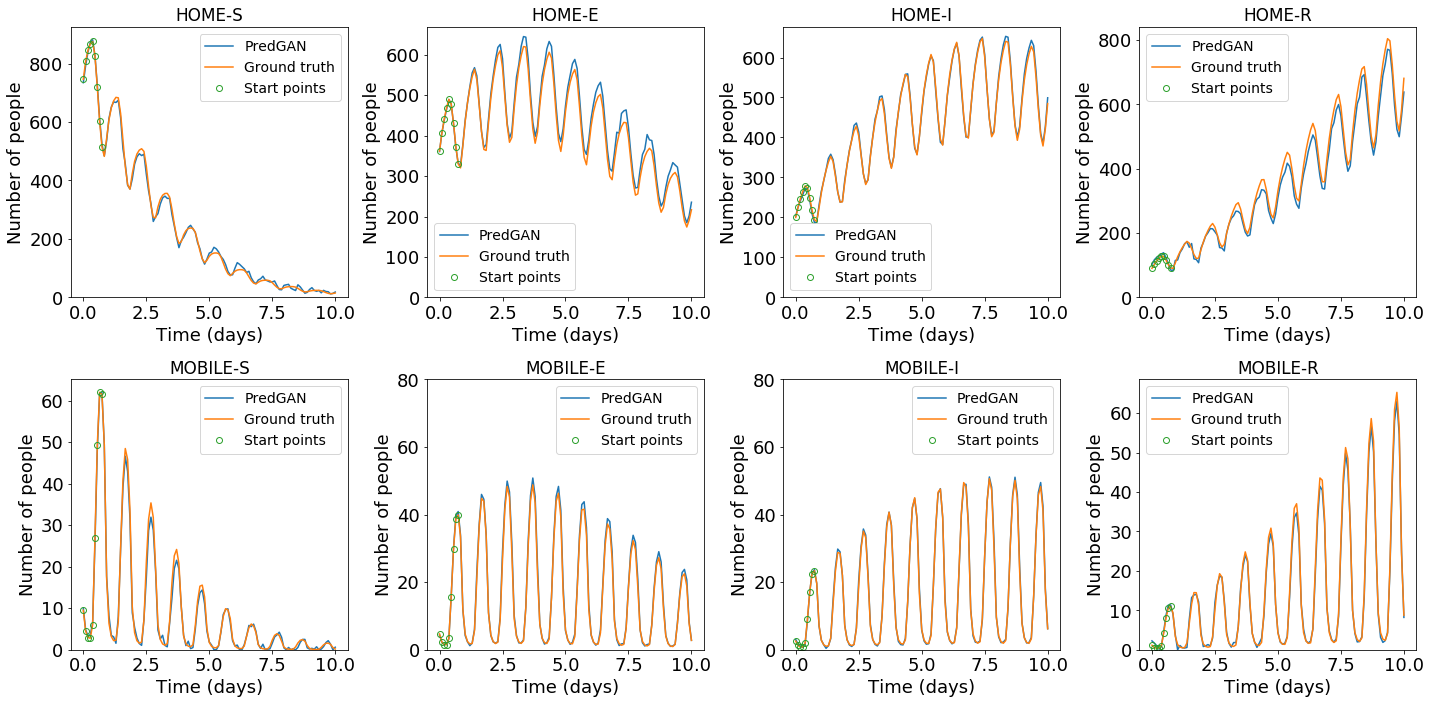

In [58]:
mpl.rcParams.update({'font.size': 14})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=18)
fig, ax = plt.subplots(2,4, figsize=[20,10])
for i, group in enumerate(groups):
    ax.flatten()[i].plot(np.linspace(0,((ntimes-2)+100)*8000/86400,((ntimes-1)+100)), X_generated[:(ntimes-1)+100,i*nl*nc+4], '-')
    ax.flatten()[i].plot(np.linspace(0,((ntimes-2)+100)*8000/86400,((ntimes-1)+100)), X_test_1D[nplot:nplot+((ntimes-1)+100)*step:step,i*nl*nc+4], '-')
    ax.flatten()[i].plot(np.linspace(0,(ntimes-2)*8000/86400,(ntimes-1)), X_test_1D[nplot:nplot+((ntimes-1))*step:step,i*nl*nc+4], 'o', fillstyle='none', markersize = 6)
    ax.flatten()[i].set_ylim(bottom=0)
    if group in ['MOBILE-E','MOBILE-I']:
        ax.flatten()[i].set_ylim(top=80)
    ax.flatten()[i].set_title(group)
    ax.flatten()[i].set_xlabel('Time (days)')
    ax.flatten()[i].set_ylabel('Number of people')
    ax.flatten()[i].legend(['PredGAN', 'Ground truth', 'Start points'])
plt.tight_layout()
#plt.savefig('run2test_nrun17c.eps')

### Test run 14

Initial point losses: [14.858084, 14.877116, 14.954185, 14.853669, 14.633162, 14.985979, 14.956567, 14.911404, 14.910443, 14.9311695]
Loss iteration 1: 12.620571 - 3s
Loss iteration 2: 12.207442 - 3s
Loss iteration 3: 11.131463 - 3s
Loss iteration 4: 13.56437 - 3s
Loss iteration 5: 10.145281 - 3s
Loss iteration 6: 12.129543 - 3s
Loss iteration 7: 9.496944 - 3s
Loss iteration 8: 8.252176 - 3s
Loss iteration 9: 5.772862 - 3s
Loss iteration 10: 5.8299375 - 3s
Loss iteration 11: 4.3836017 - 3s
Loss iteration 12: 5.0337358 - 3s
Loss iteration 13: 4.111127 - 3s
Loss iteration 14: 4.8697324 - 3s
Loss iteration 15: 5.542495 - 3s
Loss iteration 16: 6.2044306 - 3s
Loss iteration 17: 5.624336 - 3s
Loss iteration 18: 5.419395 - 3s
Loss iteration 19: 6.2552814 - 3s
Loss iteration 20: 4.416496 - 3s
Loss iteration 21: 5.415857 - 3s
Loss iteration 22: 4.8001933 - 3s
Loss iteration 23: 4.7057266 - 3s
Loss iteration 24: 3.3898706 - 3s
Loss iteration 25: 4.41477 - 3s
Loss iteration 26: 16.77963 - 3s
Loss

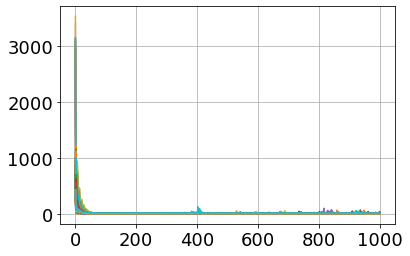

In [59]:
np.random.seed(0)
tf.random.set_seed(0)

run = 14
lag = 600
n = len(times)*run - ntimes*step*run + lag
nplot = n + run*ntimes*step 

real_coding = X_test_concat[n].reshape(1,-1)
real_coding = real_coding[:,:codings_size*(ntimes - 1)]
real_coding = tf.constant(real_coding)
real_coding = tf.cast(real_coding, dtype=tf.float32)
R0s_run = real_coding[0,-2:]

list_latent_values = []
list_loss = []
for _ in range(10):
    latent_values = tf.random.normal([len(real_coding), latent_size], mean=0.0, stddev=0.01)  
    latent_values = tf.Variable(latent_values)     
    latent_values, loss = optimize_coding(latent_values, real_coding, epochs=1000)
    list_latent_values.append(latent_values)
    list_loss.append(loss)
latent_values = list_latent_values[np.argmin(list_loss)]
print('Initial point losses: ', end='')
print(list_loss)
        
X_predict = list(generator(latent_values).numpy().reshape(-1,codings_size))
gen_predict = X_predict[-1]
gen_predict[-2:] = R0s_run

real_coding = np.concatenate((real_coding, gen_predict.reshape(1,-1)), axis=1)[:,codings_size:]
real_coding = tf.constant(real_coding)
real_coding = tf.cast(real_coding, dtype=tf.float32)

for i in range(100): #range(2000,len(X_train_concat)-1):
    start = time.time()
    latent_values, loss = optimize_coding(latent_values, real_coding, epochs=1000)
    print('Loss iteration '+str(i+1)+': '+str(loss), end=' - ')
      
    gen_predict = generator(latent_values)[:,(ntimes - 1):,:,:].numpy().flatten()
    X_predict.append(gen_predict)
    gen_predict[-2:] = R0s_run
    
    real_coding = np.concatenate((real_coding, gen_predict.reshape(1,-1)), axis=1)[:,codings_size:]
    real_coding = tf.constant(real_coding)
    real_coding = tf.cast(real_coding, dtype=tf.float32)
    print ('{:.0f}s'.format( time.time()-start))
    
X_predict = np.array(X_predict)
plt.grid()

In [60]:
X_generated = scaler.inverse_transform(X_predict)
R0_generated = X_generated[:,pca_size:]
X_generated = pca_compress.inverse_transform(X_generated[:,:pca_size])
X_generated = X_generated.reshape(len(X_predict), len(groups)*nl*nc)
X_generated[X_generated<0] = 0 

In [61]:
X_real = scaler.inverse_transform(X_test_concat_flatten[n].reshape(ntimes,codings_size))
R0_real = X_real[:,pca_size:]

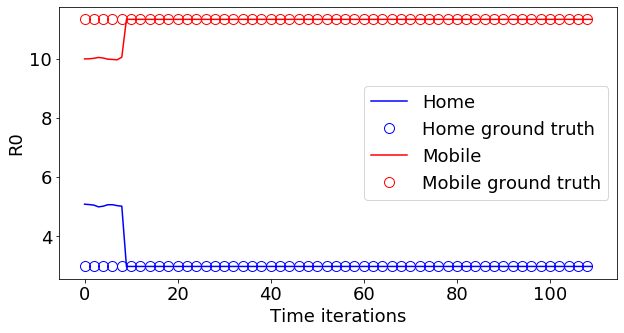

In [62]:
mpl.rcParams.update({'font.size': 18})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=18)
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(R0_generated[:,0], 'b-')
ax.plot(list(R0_real[0,:1])*len(R0_generated), 'bo', markevery=2, fillstyle='none', markersize = 10)
ax.plot(R0_generated[:,1], 'r-')
ax.plot(list(R0_real[0,1:])*len(R0_generated), 'ro', markevery=2, fillstyle='none', markersize = 10)
ax.set_xlabel('Time iterations')
ax.set_ylabel('R0')
ax.legend(['Home', 'Home ground truth', 'Mobile', 'Mobile ground truth',])
#plt.grid()
#plt.savefig('run2test_nrun14_r0.eps');

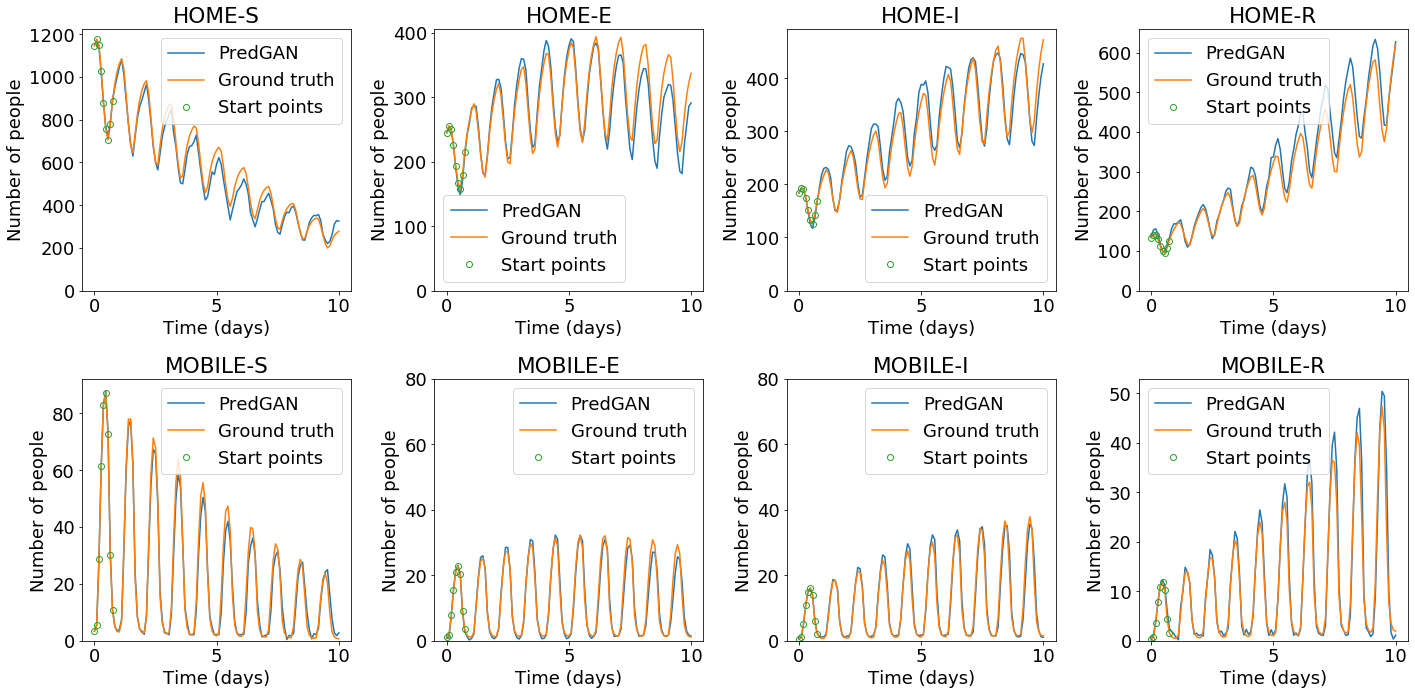

In [63]:
mpl.rcParams.update({'font.size': 18})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=18)
fig, ax = plt.subplots(2,4, figsize=[20,10])
for i, group in enumerate(groups):
    ax.flatten()[i].plot(np.linspace(0,((ntimes-2)+100)*8000/86400,((ntimes-1)+100)), X_generated[:(ntimes-1)+100,i*nl*nc+4], '-')
    ax.flatten()[i].plot(np.linspace(0,((ntimes-2)+100)*8000/86400,((ntimes-1)+100)), X_test_1D[nplot:nplot+((ntimes-1)+100)*step:step,i*nl*nc+4], '-')
    ax.flatten()[i].plot(np.linspace(0,(ntimes-2)*8000/86400,(ntimes-1)), X_test_1D[nplot:nplot+((ntimes-1))*step:step,i*nl*nc+4], 'o', fillstyle='none', markersize = 6)
    ax.flatten()[i].set_ylim(bottom=0)
    if group in ['MOBILE-E','MOBILE-I']:
        ax.flatten()[i].set_ylim(top=80)
    ax.flatten()[i].set_title(group)
    ax.flatten()[i].set_xlabel('Time (days)')
    ax.flatten()[i].set_ylabel('Number of people')
    ax.flatten()[i].legend(['PredGAN', 'Ground truth', 'Start points'])
plt.tight_layout()
#plt.savefig('run2test_nrun14c.eps')